In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
using SymPy
using ColorSchemes
using Colors
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/origin_patch.jl")

anal_origin_3p_bc (generic function with 1 method)

The purpose of this notebook is to verify that the analytically computed eigenvectors and eigenvalues match with the numerical eigenvectors and eigenvalues.

In [2]:
omega = exp(im * 2 * pi / 3)

-0.4999999999999998 + 0.8660254037844387im

In [3]:
function mesh_grid(list1, list2, type)
    l1 = length(list1)
    l2 = length(list2)
    grid = Array{type}(undef, l1 * l2, 2)
    for j in 1:l1
        grid[1 + (j-1)*l2:j*l2, 1] = ones(l2) * list1[j]
        grid[1 + (j-1)*l2:j*l2, 2] = list2
    end
    return grid
end

mesh_grid (generic function with 1 method)

<font size="12">$$\text{Eigenvalues}$$</font>

In [26]:
function check_eigenvalues()
    coords = range(-5, 5, 10^2)
    angs = range(-pi, pi, 10^2)
    mags = range(0, 10.322, 10^2)
    x0 = 1.3
    y0 = -2.13
    alph_mag0 = 2
    alph_ang0 = exp(im * 2.231)
    delt_mag0 = 12.432
    delt_ang0 = exp(im * 1.214)

    # x, y, arg(alpha), |alpha|, arg(delta), |delta|
    values = Array{Float64}(undef, 2, 6, 3, 10^2)
    for i in 1:10^2
        values[1, 1, :, i] = real.(analytic_eigenvalues(alph_mag0 * alph_ang0, delt_mag0 * delt_ang0, coords[i], y0))
        values[1, 2, :, i] = real.(analytic_eigenvalues(alph_mag0 * alph_ang0, delt_mag0 * delt_ang0, x0, coords[i]))
        values[1, 3, :, i] = real.(analytic_eigenvalues(alph_mag0 * exp(im * angs[i]), delt_mag0 * delt_ang0, x0, y0))
        values[1, 4, :, i] = real.(analytic_eigenvalues(mags[i] * alph_ang0, delt_mag0 * delt_ang0, x0, y0))
        values[1, 5, :, i] = real.(analytic_eigenvalues(alph_mag0 * alph_ang0, delt_mag0 * exp(im * angs[i]), x0, y0))
        values[1, 6, :, i] = real.(analytic_eigenvalues(alph_mag0 * alph_ang0, mags[i] * delt_ang0, x0, y0))


        ham = H_mft_v2([coords[i], y0], delt_mag0 * delt_ang0, 2 * alph_mag0 * alph_ang0)
        values[2, 1, :, i] = real.(eigvals(Hermitian(ham)))
        ham = H_mft_v2([x0, coords[i]], delt_mag0 * delt_ang0, 2 * alph_mag0 * alph_ang0)
        values[2, 2, :, i] = real.(eigvals(Hermitian(ham)))
        ham = H_mft_v2([x0, y0], delt_mag0 * delt_ang0, 2 * alph_mag0 * exp(im * angs[i]))
        values[2, 3, :, i] = real.(eigvals(Hermitian(ham)))
        ham = H_mft_v2([x0, y0], delt_mag0 * delt_ang0, 2 * mags[i] * alph_ang0)
        values[2, 4, :, i] = real.(eigvals(Hermitian(ham)))
        ham = H_mft_v2([x0, y0], delt_mag0 * exp(im * angs[i]), 2 * alph_mag0 * alph_ang0)
        values[2, 5, :, i] = real.(eigvals(Hermitian(ham)))
        ham = H_mft_v2([x0, y0], mags[i] * delt_ang0, 2 * alph_mag0 * alph_ang0)
        values[2, 6, :, i] = real.(eigvals(Hermitian(ham)))
       
    end
   
    P = Figure(size=(2000, 2000), fontsize=30)
    ax1 = Axis(P[1, 1], xlabel = L"x")
    ax2 = Axis(P[1, 2], xlabel = L"y")
    ax3 = Axis(P[2, 1], xlabel = L"arg(\alpha)")
    ax4 = Axis(P[2, 2], xlabel = L"|\alpha|")
    ax5 = Axis(P[3, 1], xlabel = L"arg(\Delta)")
    ax6 = Axis(P[3, 2], xlabel = L"|\Delta|")
    for j in 2:2
        lines!(ax1, coords, values[1, 1, j, :], label = "anal")
        lines!(ax1, coords, values[2, 1, j, :], label = "ed")

        lines!(ax2, coords, values[1, 2, j, :], label = "anal")
        lines!(ax2, coords, values[2, 2, j, :], label = "ed")

        lines!(ax3, angs, values[1, 3, j, :], label = "anal")
        lines!(ax3, angs, values[2, 3, j, :], label = "ed")

        lines!(ax4, mags, values[1, 4, j, :], label = "anal")
        lines!(ax4, mags, values[2, 4, j, :], label = "ed")

        lines!(ax5, angs, values[1, 5, j, :], label = "anal")
        lines!(ax5, angs, values[2, 5, j, :], label = "ed")

        lines!(ax6, mags, values[1, 6, j, :], label = "anal")
        lines!(ax6, mags, values[2, 6, j, :], label = "ed")
    end
    P
end

check_eigenvalues (generic function with 1 method)

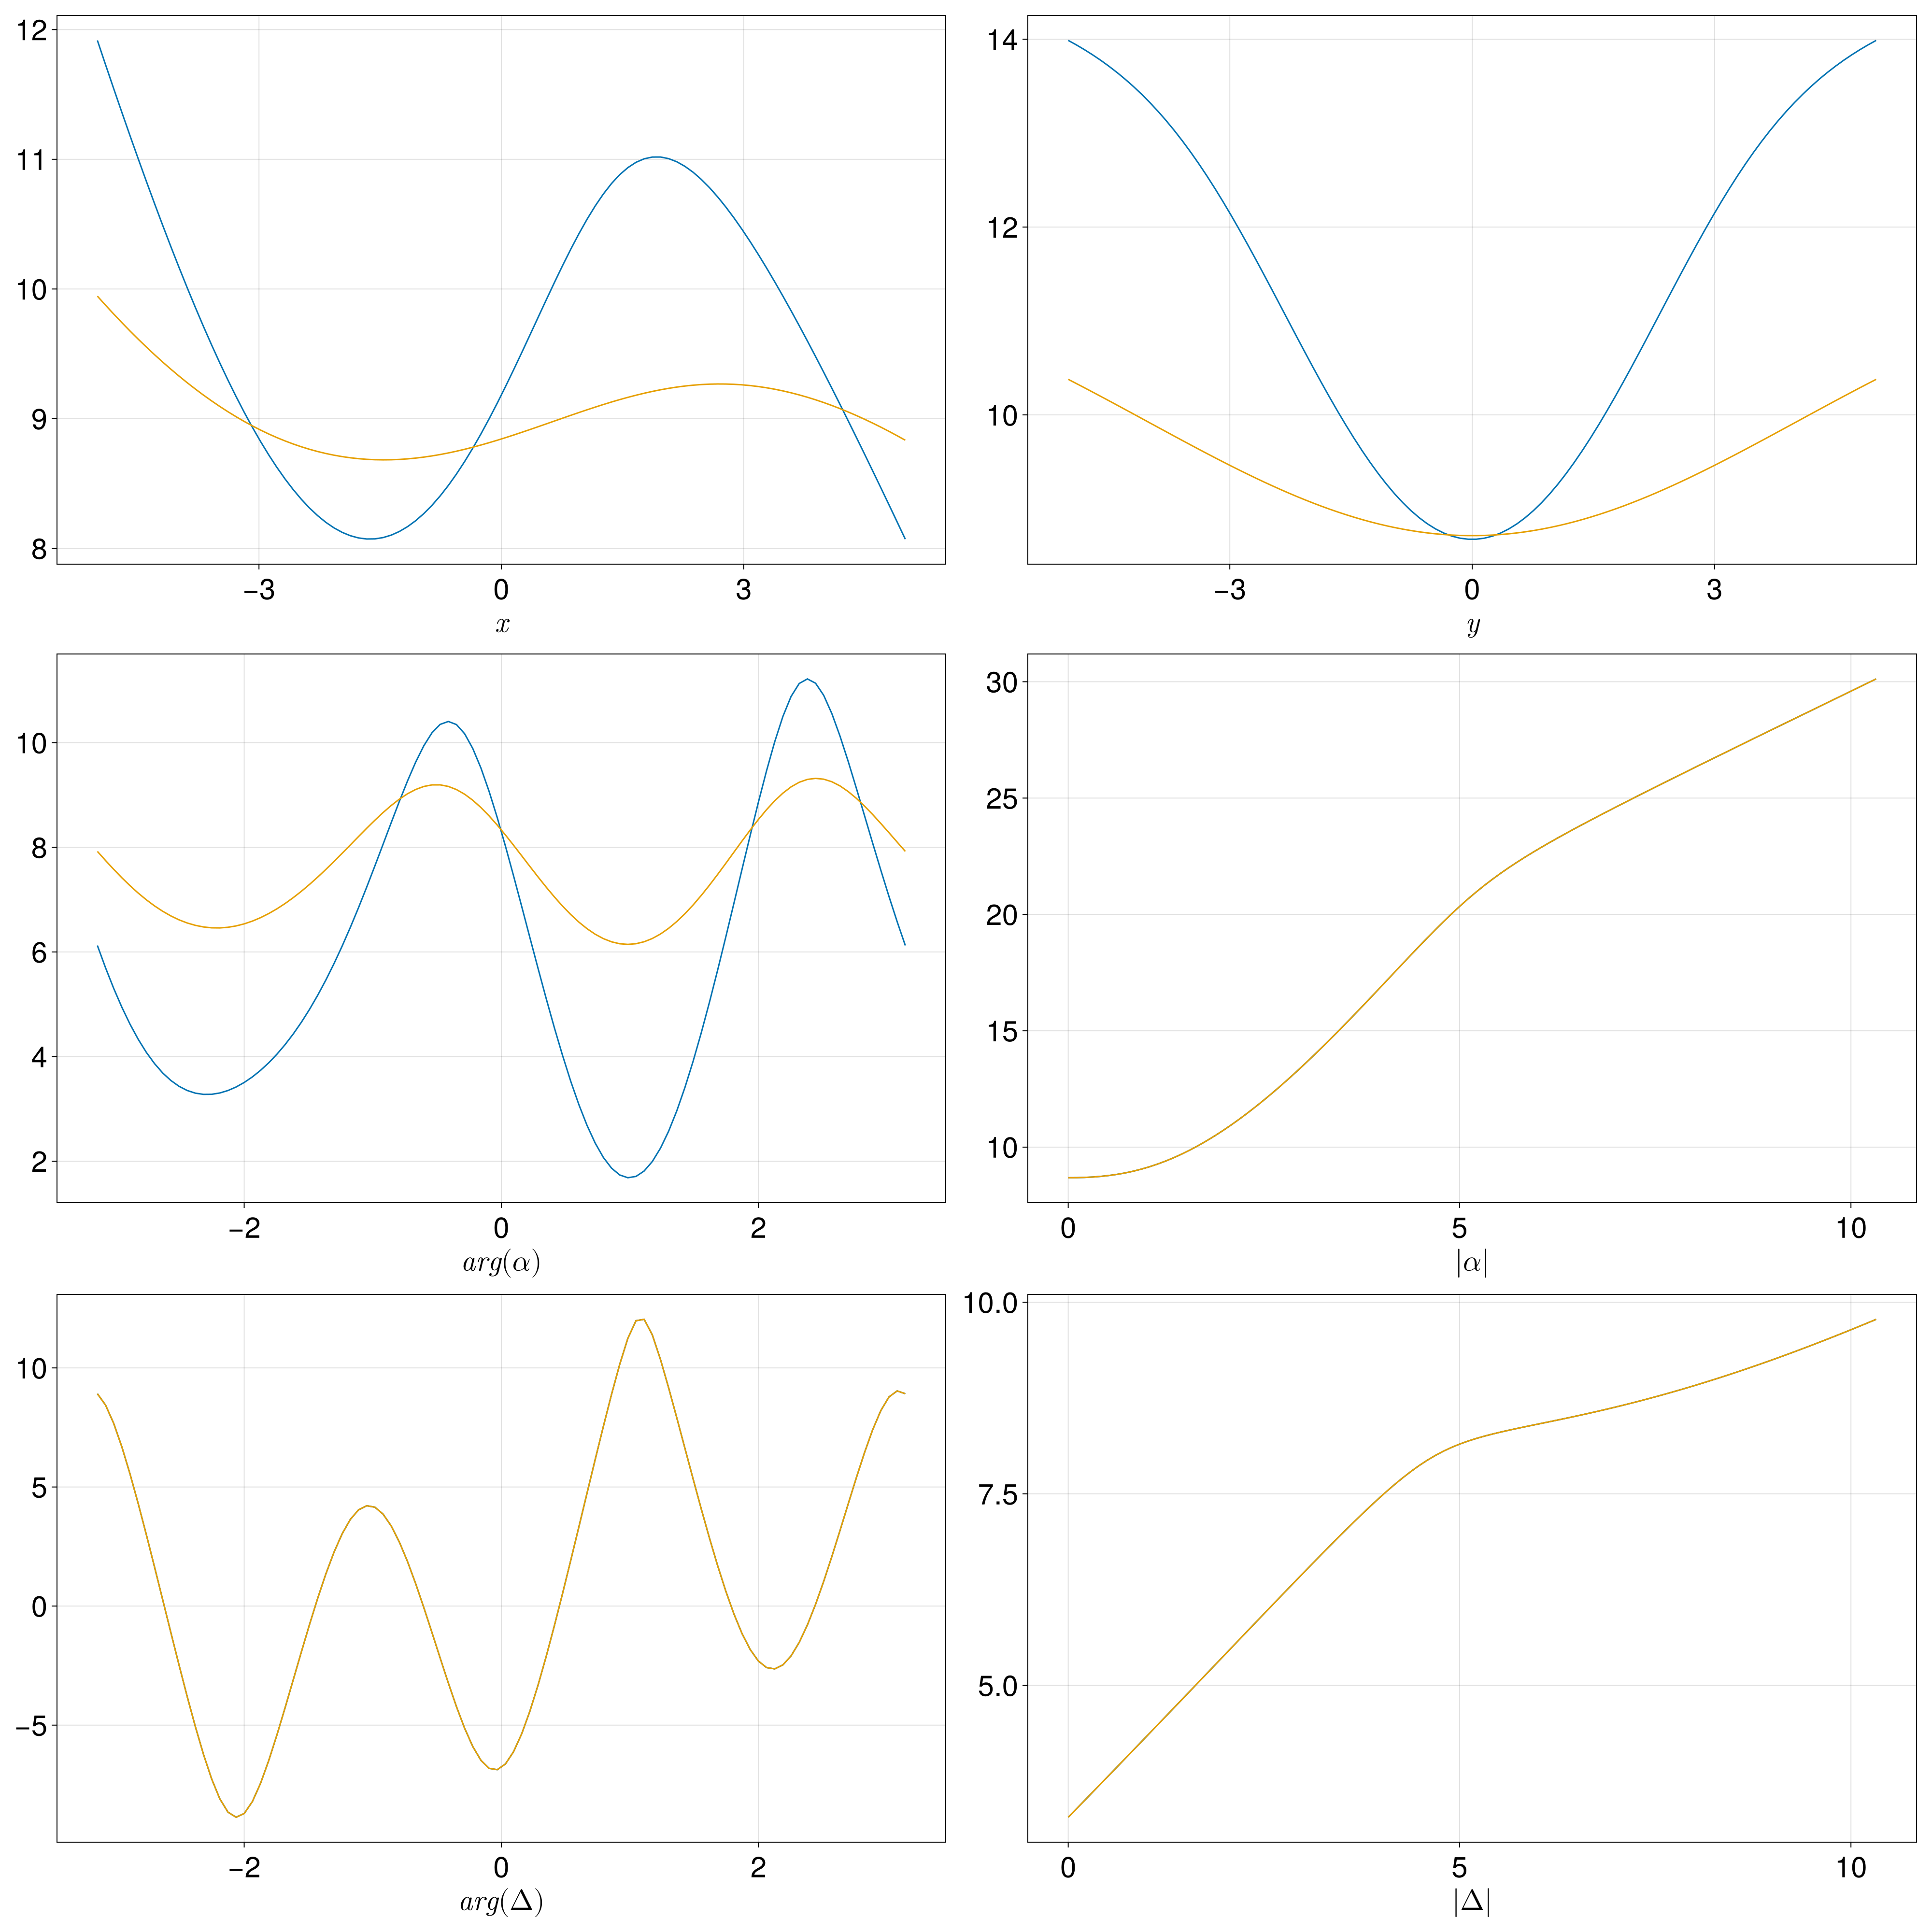

In [25]:
check_eigenvalues()

<font size="12">$$\text{Eigenvectors}$$</font>

In [9]:
function check_eigenvector(l)
    coords = range(-5, 5, 10^2)
    angs = range(-pi, pi, 10^2)
    mags = range(0, 3, 10^2)
    x0 = 10.34
    y0 = 31.23
    alph_mag0 = 2
    alph_ang0 = exp(im * 3.231)
    delt_mag0 = 12.432
    delt_ang0 = exp(im * 1.214)

    # x, y, arg(alpha), |alpha|, arg(delta), |delta|
    vectors = Array{ComplexF64}(undef, 2, 6, 3, 10^2)
    for i in 1:10^2
        val = analytic_eigenvalues(alph_mag0 * alph_ang0, delt_mag0 * delt_ang0, coords[i], y0)[l]
        vectors[1, 1, :, i] = analytic_eigenvectors(val, alph_mag0 * alph_ang0, delt_mag0 * delt_ang0, coords[i], y0)
        val = analytic_eigenvalues(alph_mag0 * alph_ang0, delt_mag0 * delt_ang0, x0, coords[i])[l]
        vectors[1, 2, :, i] = analytic_eigenvectors(val, alph_mag0 * alph_ang0, delt_mag0 * delt_ang0, x0, coords[i])
        val = analytic_eigenvalues(alph_mag0 * exp(im * angs[i]), delt_mag0 * delt_ang0, x0, y0)[l]
        vectors[1, 3, :, i] = analytic_eigenvectors(val, alph_mag0 * exp(im * angs[i]), delt_mag0 * delt_ang0, x0, y0)
        val = analytic_eigenvalues(mags[i] * alph_ang0, delt_mag0 * delt_ang0, x0, y0)[l]
        vectors[1, 4, :, i] = analytic_eigenvectors(val, mags[i] * alph_ang0, delt_mag0 * delt_ang0, x0, y0)
        val = analytic_eigenvalues(alph_mag0 * alph_ang0, delt_mag0 * exp(im * angs[i]), x0, y0)[l]
        vectors[1, 5, :, i] = analytic_eigenvectors(val, alph_mag0 * alph_ang0, delt_mag0 * exp(im * angs[i]), x0, y0)
        val = analytic_eigenvalues(alph_mag0 * alph_ang0, mags[i] * delt_ang0, x0, y0)[l]
        vectors[1, 6, :, i] = analytic_eigenvectors(val, alph_mag0 * alph_ang0, mags[i] * delt_ang0, x0, y0)


        ham = H_mft_v2([coords[i], y0], delt_mag0 * delt_ang0, 2 * alph_mag0 * alph_ang0)
        vectors[2, 1, :, i] = eigvecs(Hermitian(ham))[:, l]
        ham = H_mft_v2([x0, coords[i]], delt_mag0 * delt_ang0, 2 * alph_mag0 * alph_ang0)
        vectors[2, 2, :, i] = eigvecs(Hermitian(ham))[:, l]
        ham = H_mft_v2([x0, y0], delt_mag0 * delt_ang0, 2 * alph_mag0 * exp(im * angs[i]))
        vectors[2, 3, :, i] = eigvecs(Hermitian(ham))[:, l]
        ham = H_mft_v2([x0, y0], delt_mag0 * delt_ang0, 2 * mags[i] * alph_ang0)
        vectors[2, 4, :, i] = eigvecs(Hermitian(ham))[:, l]
        ham = H_mft_v2([x0, y0], delt_mag0 * exp(im * angs[i]), 2 * alph_mag0 * alph_ang0)
        vectors[2, 5, :, i] = eigvecs(Hermitian(ham))[:, l]
        ham = H_mft_v2([x0, y0], mags[i] * delt_ang0, 2 * alph_mag0 * alph_ang0)
        vectors[2, 6, :, i] = eigvecs(Hermitian(ham))[:, l]
       
    end
   
    P = Figure(size=(2000, 2000), fontsize=30)
    ax1 = Axis(P[1, 1], xlabel = L"x")
    ax2 = Axis(P[1, 2], xlabel = L"y")
    ax3 = Axis(P[2, 1], xlabel = L"arg(\alpha)")
    ax4 = Axis(P[2, 2], xlabel = L"|\alpha|")
    ax5 = Axis(P[3, 1], xlabel = L"arg(\Delta)")
    ax6 = Axis(P[3, 2], xlabel = L"|\Delta|")
    for j in 1:3
        lines!(ax1, coords, abs.(vectors[1, 1, j, :] ./ vectors[1, 1, 1 + (j + 1) % 3, :]), label = "anal")
        lines!(ax1, coords, abs.(vectors[2, 1, j, :] ./ vectors[2, 1, 1 + (j + 1) % 3, :]), label = "ed")

        lines!(ax2, coords, abs.(vectors[1, 2, j, :] ./ vectors[1, 2, 1 + (j + 1) % 3, :]), label = "anal")
        lines!(ax2, coords, abs.(vectors[2, 2, j, :] ./ vectors[2, 2, 1 + (j + 1) % 3, :]), label = "ed")

        lines!(ax3, angs, abs.(vectors[1, 3, j, :] ./ vectors[1, 3, 1 + (j + 1) % 3, :]), label = "anal")
        lines!(ax3, angs, abs.(vectors[2, 3, j, :] ./ vectors[2, 3, 1 + (j + 1) % 3, :]), label = "ed")

        lines!(ax4, mags, abs.(vectors[1, 4, j, :] ./ vectors[1, 4, 1 + (j + 1) % 3, :]), label = "anal")
        lines!(ax4, mags, abs.(vectors[2, 4, j, :] ./ vectors[2, 4, 1 + (j + 1) % 3, :]), label = "ed")

        lines!(ax5, angs, abs.(vectors[1, 5, j, :] ./ vectors[1, 5, 1 + (j + 1) % 3, :]), label = "anal")
        lines!(ax5, angs, abs.(vectors[2, 5, j, :] ./ vectors[2, 5, 1 + (j + 1) % 3, :]), label = "ed")

        lines!(ax6, mags, abs.(vectors[1, 6, j, :] ./ vectors[1, 6, 1 + (j + 1) % 3, :]), label = "anal")
        lines!(ax6, mags, abs.(vectors[2, 6, j, :] ./ vectors[2, 6, 1 + (j + 1) % 3, :]), label = "ed")
    end
    P
end

check_eigenvector (generic function with 1 method)

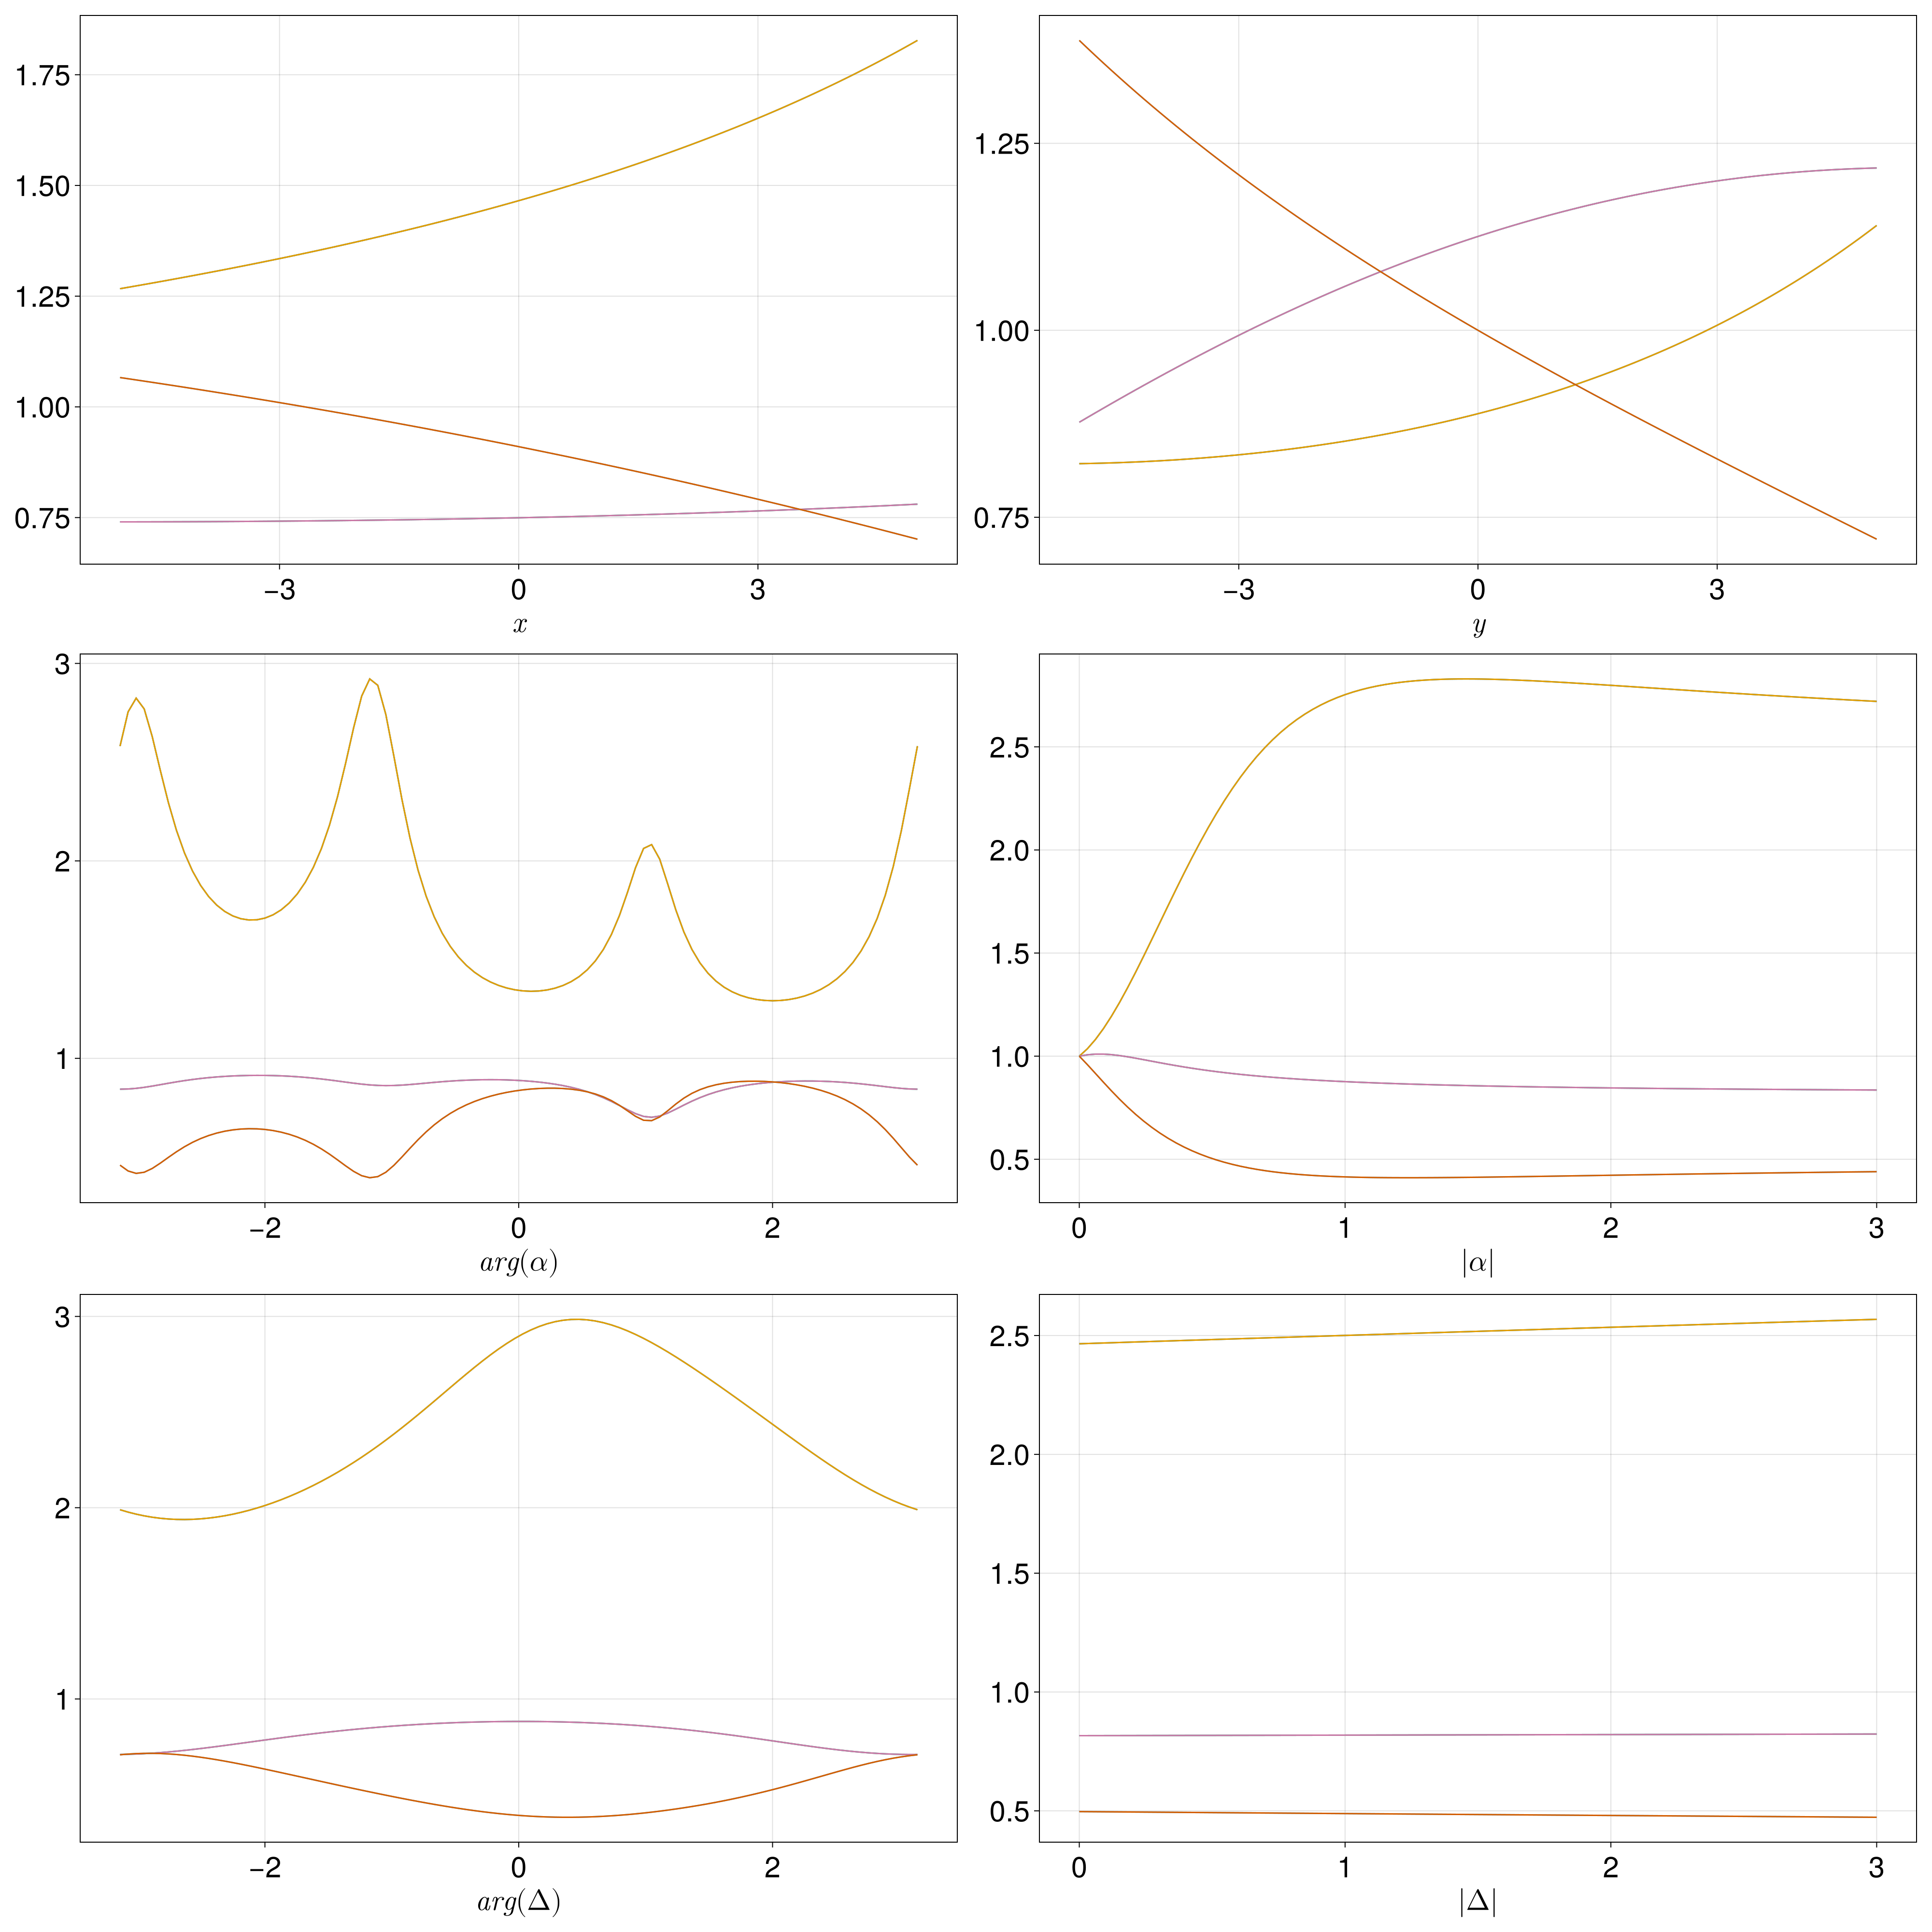

In [10]:
check_eigenvector(1)

<font size="12">$$\text{Derivatives}$$</font>

In [5]:
function compute_nmz(delta, alpha, k, index)
    epsilon = analytic_eigenvalues(alpha, delta, k[1], k[2])[index]
    # convenience
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    # normalization
    # nmz = (epsilon^6 + epsilon^4 * (abs2(f3) - 2 * abs2(f1) - 2 * abs2(f5)) - 2 * epsilon^3 * real(f1 * f3 * f5) + 
    # epsilon^2 * (abs2(f1)^2 + abs2(f5)^2 + 2 * abs2(f1) * abs2(f5) - 2 * abs2(f1) * abs2(f3) + abs2(f3) * abs2(f5)) + 
    # 2 * epsilon * real(f1 * f3 * f5) * (abs2(f1) + abs2(f3) + abs2(f5)) + abs2(f1) * abs2(f3) * (abs2(f1) + abs2(f3) + abs2(f5)))
    nmz = epsilon
    return nmz
end

compute_nmz (generic function with 1 method)

In [7]:
# At the origin
function analytic_d_nmz(delta, alpha, index)
    omega = exp(im * 2 * pi/ 3)
    k = index - 2

    # dx_nmz = (-96 * real(omega^k * delta)^4 * real(alpha * conj(delta)) + 
    # 6 * abs2(delta)^2 * real(alpha * conj(delta)))
    dx_nmz = 0

    dy_nmz = (-96 * sqrt(3) * real(omega^k * delta)^4 * real(alpha * conj(delta)) + 
    48 * sqrt(3) * abs2(delta) * real(omega^k * delta)^2 * real(alpha * conj(delta)) -   
    6 * sqrt(3) * abs2(delta)^2 * real(alpha * conj(delta)))
    
    return dx_nmz, dy_nmz
end

analytic_d_nmz (generic function with 1 method)

In [8]:
function d_nmz(delta, alpha, k, index)
    nmz0 = compute_nmz(delta, alpha, k, index)

    n_pts = 10^2
    log_dx_list = range(1, 4, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(1, 4, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)
    anal_nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = (compute_nmz(delta, alpha, k .+ [dx, 0], index) - nmz0) / dx

        dy = 1/dy_list[j]
        nmz_list[j, 2] = (compute_nmz(delta, alpha, k .+ [0, dy], index) - nmz0) / dy

        anal_nmz_list[j, 1], anal_nmz_list[j, 2] = analytic_d_nmz(delta, alpha, index)

    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial N}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial N}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    lines!(ax1, dx_list, anal_nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial N}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial N}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    lines!(ax2, dy_list, anal_nmz_list[:, 2])
    P
end

d_nmz (generic function with 1 method)

In [13]:
delta = -1
alpha = 31 - 3im
k = [0.0, 0.0]
index = 3

3

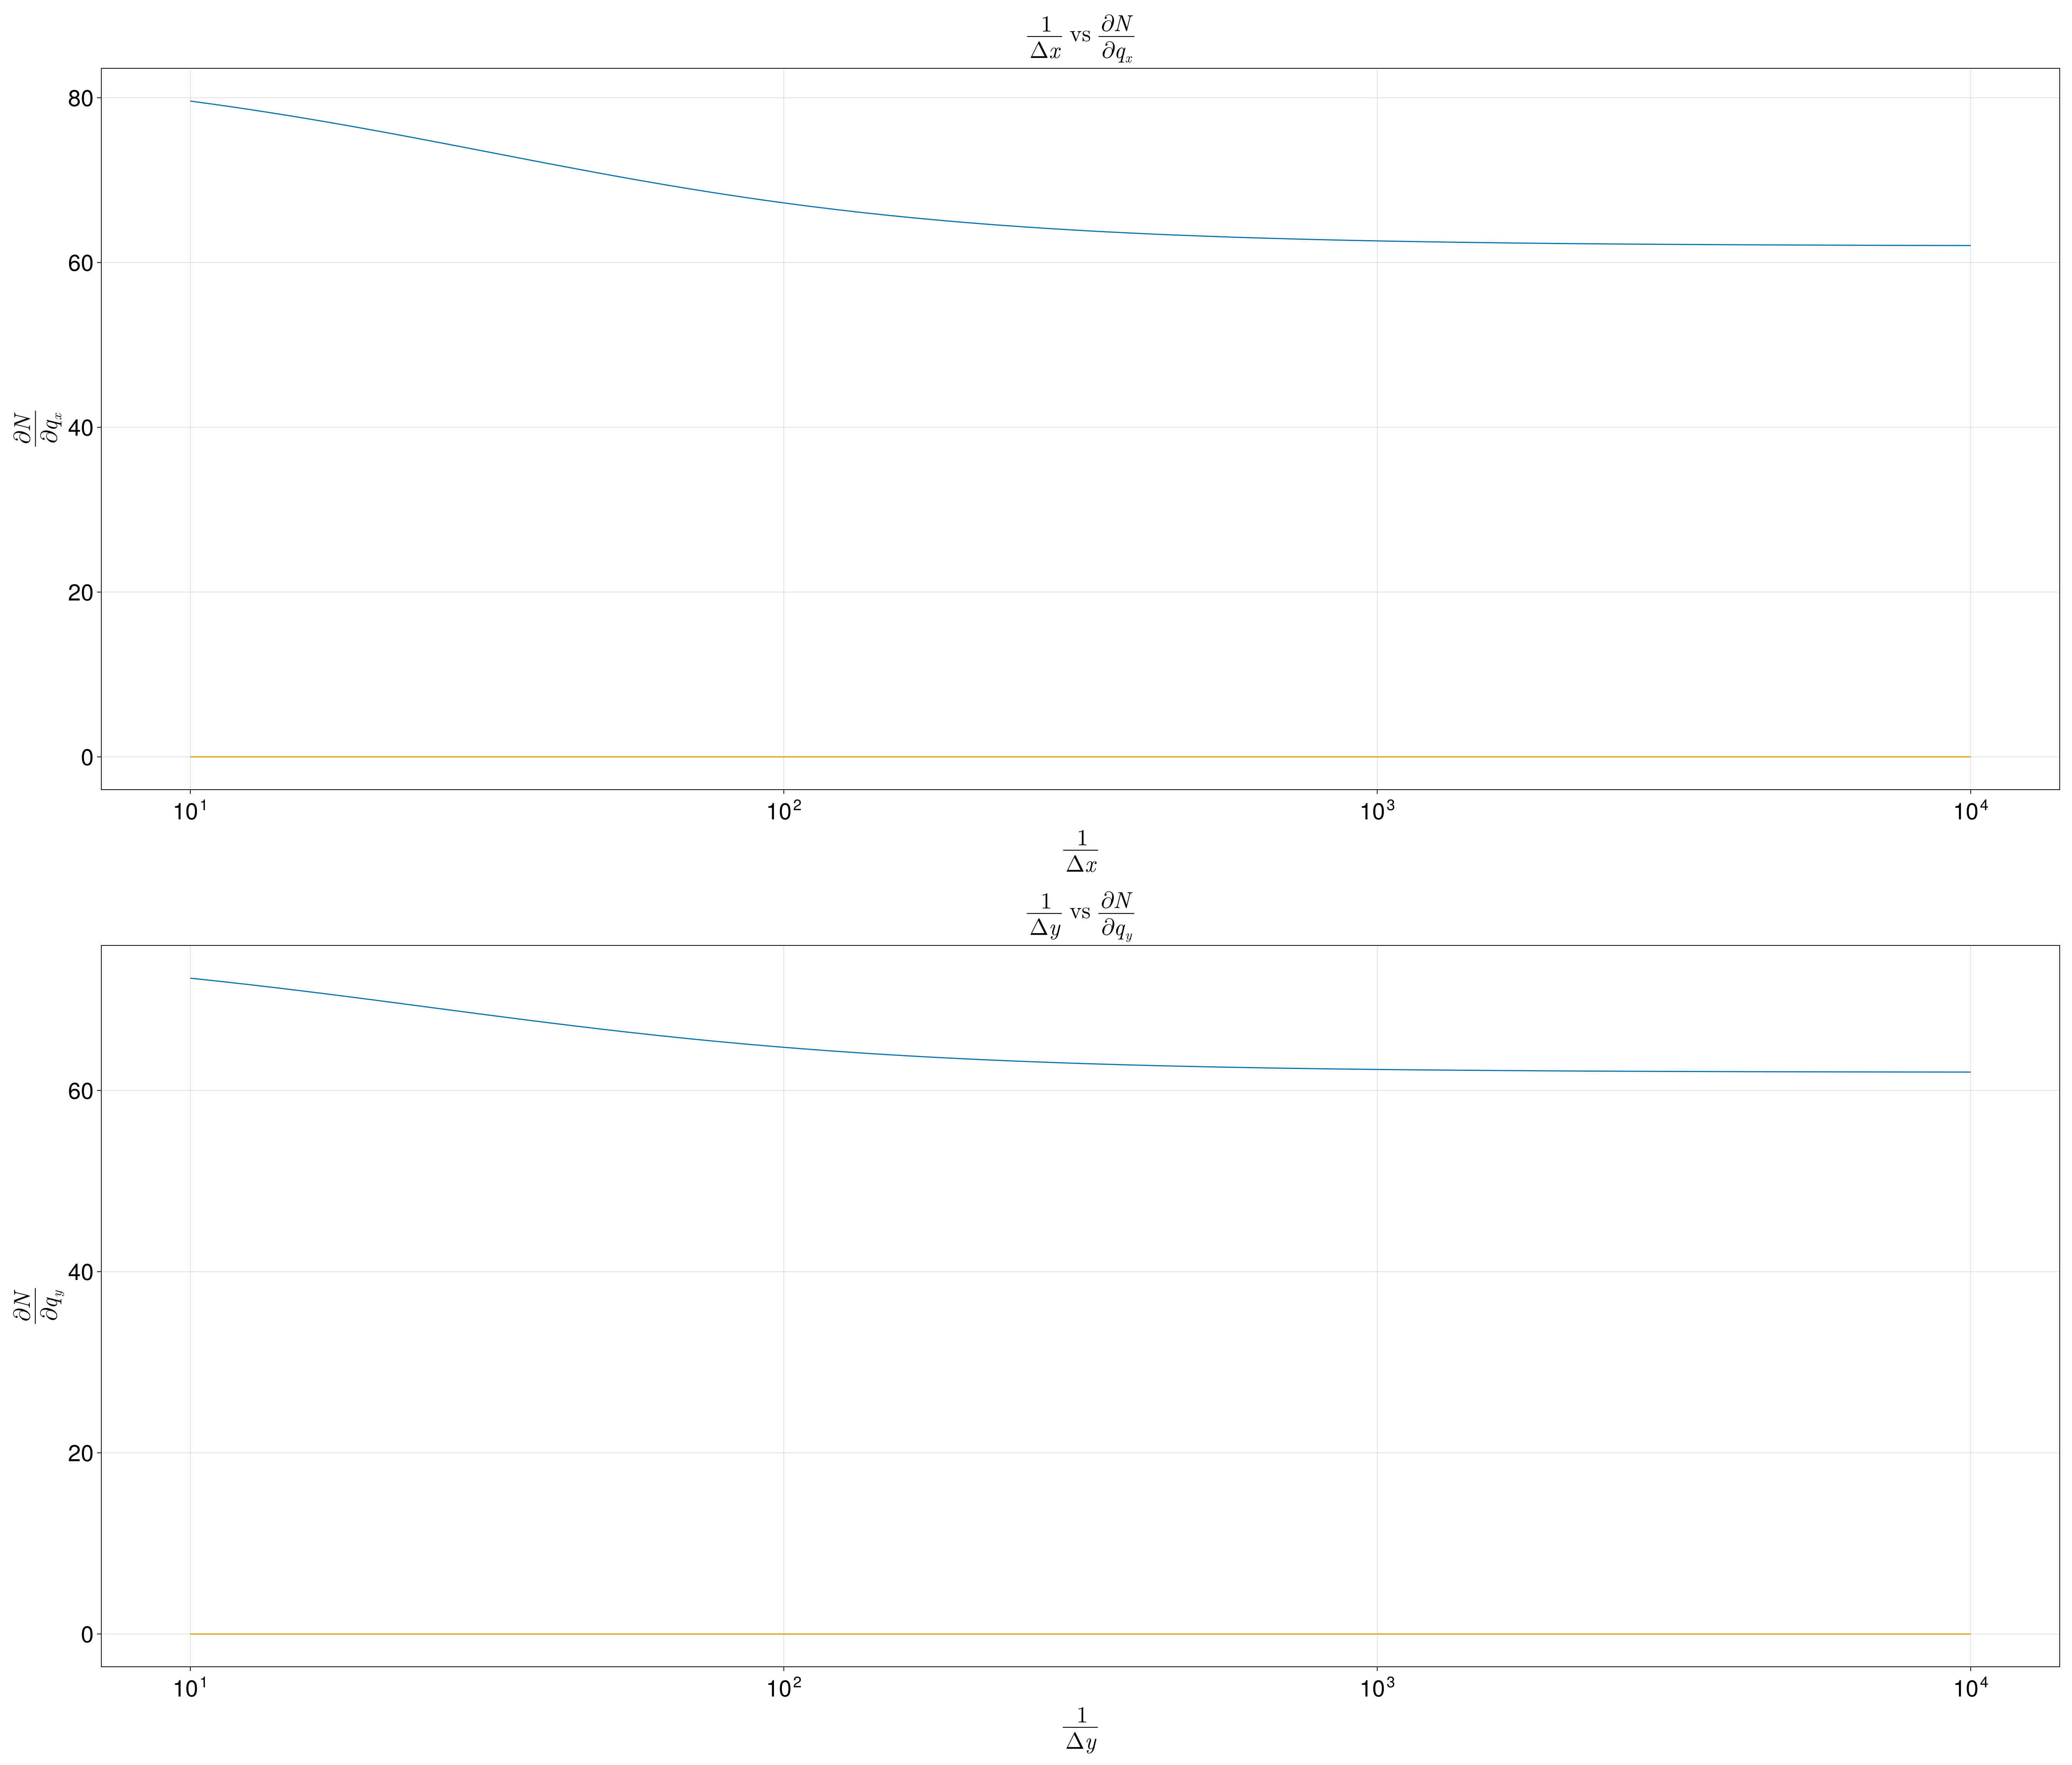

In [14]:
d_nmz(delta, alpha, k, index)

In [49]:
function compute_A1(delta, alpha, k, index)
    x, y = k
    epsilon = analytic_eigenvalues(alpha, delta, x, y)[index]
    # convenience
    q = x + im*y
    omega = exp(im * 2 * pi/ 3)
    # variables
    f1 = delta + alpha * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = epsilon^6 + epsilon^4 * (abs2(f3) - 2 * abs2(f1) - 2 * abs2(f5)) - 2 * epsilon^3 * real(f1 * f3 * f5) + 
    epsilon^2 * (abs2(f1)^2 + abs2(f5)^2 + 2 * abs2(f1) * abs2(f5) - 2 * abs2(f1) * abs2(f3) + abs2(f3) * abs2(f5)) + 
    2 * epsilon * real(f1 * f3 * f5) * (abs2(f1) + abs2(f3) + abs2(f5)) + abs2(f1) * abs2(f3) * (abs2(f1) + abs2(f3) + abs2(f5))
    # eigenvector entries
    A1 = abs(f3) * (epsilon^2 - abs2(f1))
    
    return A1 / sqrt(nmz)
end

compute_A1 (generic function with 1 method)

In [154]:
function d_A1(delta, alpha, k, index)
    A1_0 = compute_A1(delta, alpha, k, index)

    n_pts = 10^2
    log_dx_list = range(0, 4, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(0, 4, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)
    anal_nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = (compute_A1(delta, alpha, k .+ [dx, 0], index) - A1_0) / dx

        dy = 1/dy_list[j]
        nmz_list[j, 2] = (compute_A1(delta, alpha, k .+ [0, dy], index) - A1_0) / dy

        anal_nmz_list[j, 1], anal_nmz_list[j, 2] = analytic_d_A1(delta, alpha, index)

    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial A_1}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial A_1}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    lines!(ax1, dx_list, anal_nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial A_1}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial A_1}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    lines!(ax2, dy_list, anal_nmz_list[:, 2])
    P
end

d_A1 (generic function with 1 method)

In [155]:
delta = 1
alpha = 1
k = [0.0, 0.0]
index = 3

3

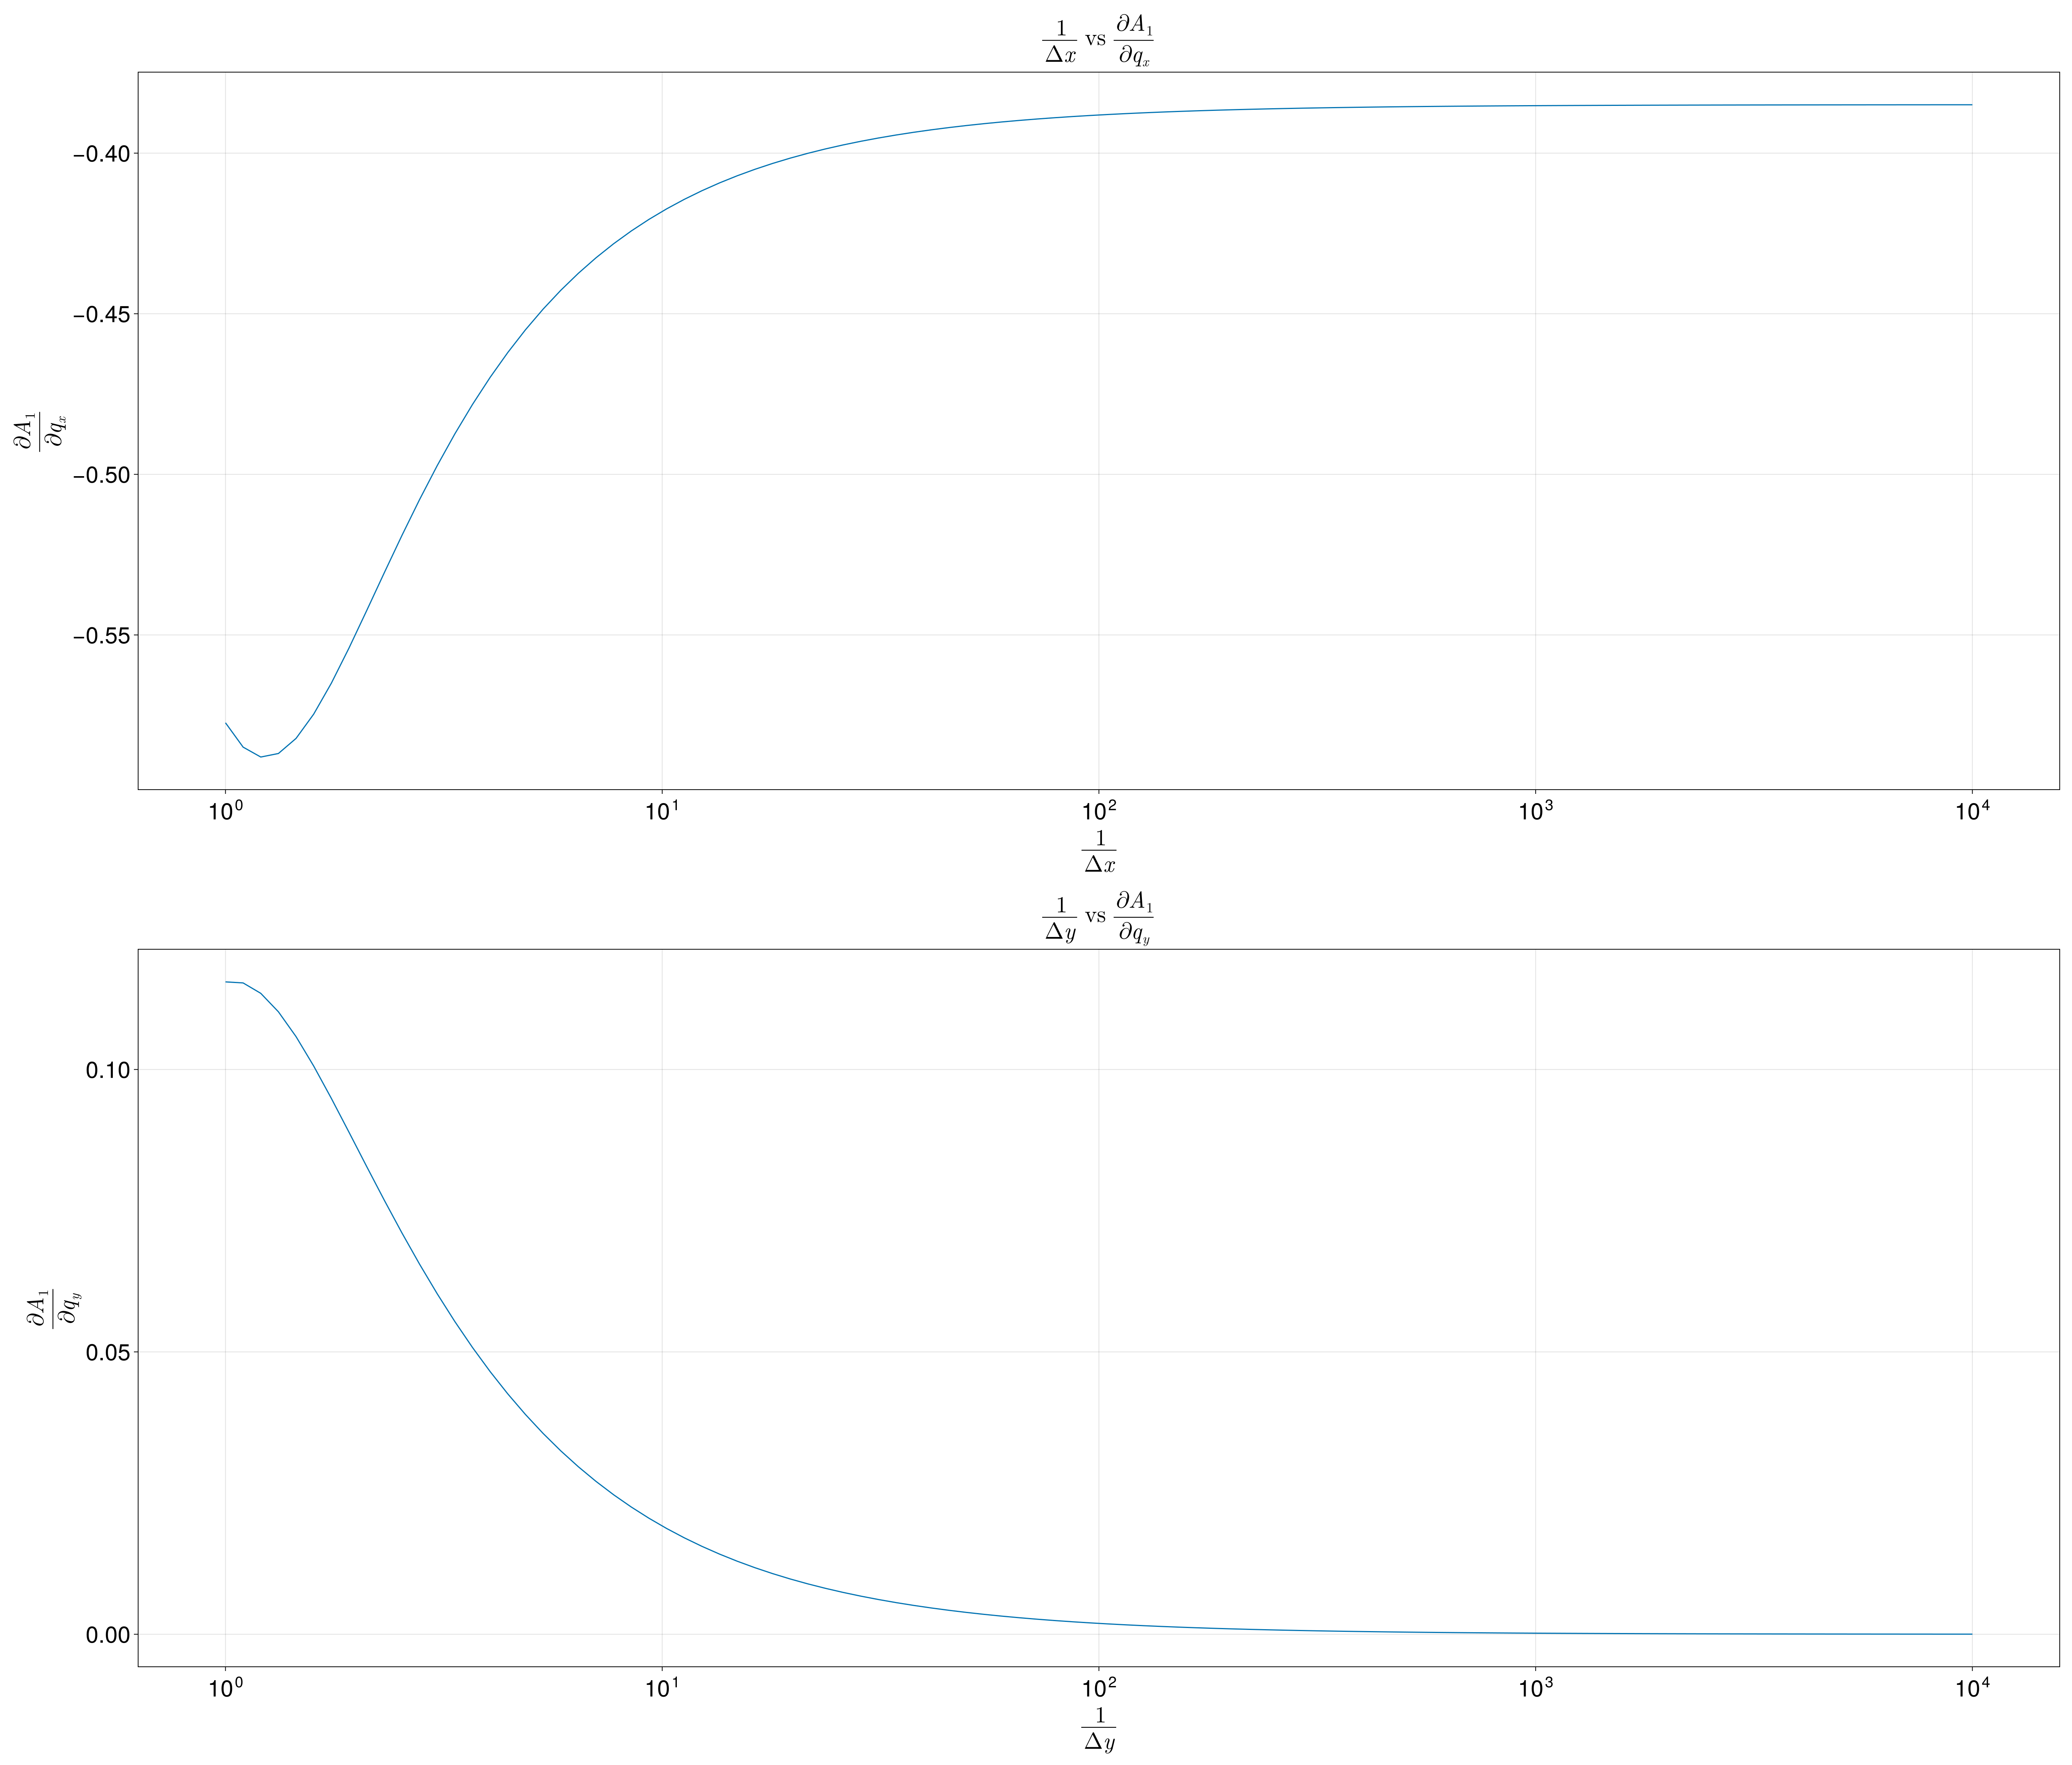

In [156]:
d_A1(delta, alpha, k, index)

In [157]:
function compute_A3(delta, alpha, k, index)
    x, y = k
    epsilon = analytic_eigenvalues(alpha, delta, x, y)[index]
    # convenience
    q = x + im * y
    omega = exp(im * 2 * pi/3)
    # variables
    f1 = delta + alpha * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (epsilon^6 + epsilon^4 * (abs2(f3) - 2 * abs2(f1) - 2 * abs2(f5)) - 2 * epsilon^3 * real(f1 * f3 * f5) + 
    epsilon^2 * (abs2(f1)^2 + abs2(f5)^2 + 2 * abs2(f1) * abs2(f5) - 2 * abs2(f1) * abs2(f3) + abs2(f3) * abs2(f5)) + 
    2 * epsilon * real(f1 * f3 * f5) * (abs2(f1) + abs2(f3) + abs2(f5)) + abs2(f1) * abs2(f3) * (abs2(f1) + abs2(f3) + abs2(f5)))
    # eigenvector entries
    A3 = conj(f3)/abs(f3) * (epsilon * (epsilon^2 - abs2(f1)) - conj(f5) * (epsilon * f5 + conj(f1) * conj(f3)))
    return A3 / sqrt(nmz)
end

compute_A3 (generic function with 1 method)

In [159]:
function d_A3(delta, alpha, k, index)
    A3_0 = compute_A3(delta, alpha, k, index)

    n_pts = 10^2
    log_dx_list = range(1, 4, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(1, 4, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)
    anal_nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = imag.((compute_A3(delta, alpha, k .+ [dx, 0], index) - A3_0) / dx)

        dy = 1/dy_list[j]
        nmz_list[j, 2] = imag.((compute_A3(delta, alpha, k .+ [0, dy], index) - A3_0) / dy)

        anal_nmz_list[j, 1], anal_nmz_list[j, 2] = imag.(analytic_d_A3(delta, alpha, index))
        #println(anal_nmz_list[j, :])

    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial A_3}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial A_3}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    lines!(ax1, dx_list, anal_nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial A_3}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial A_3}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    lines!(ax2, dy_list, anal_nmz_list[:, 2])
    P
end

d_A3 (generic function with 1 method)

In [160]:
delta = -omega
alpha = 31 - 3im
k = [0.0, 0.0]
index = 1

1

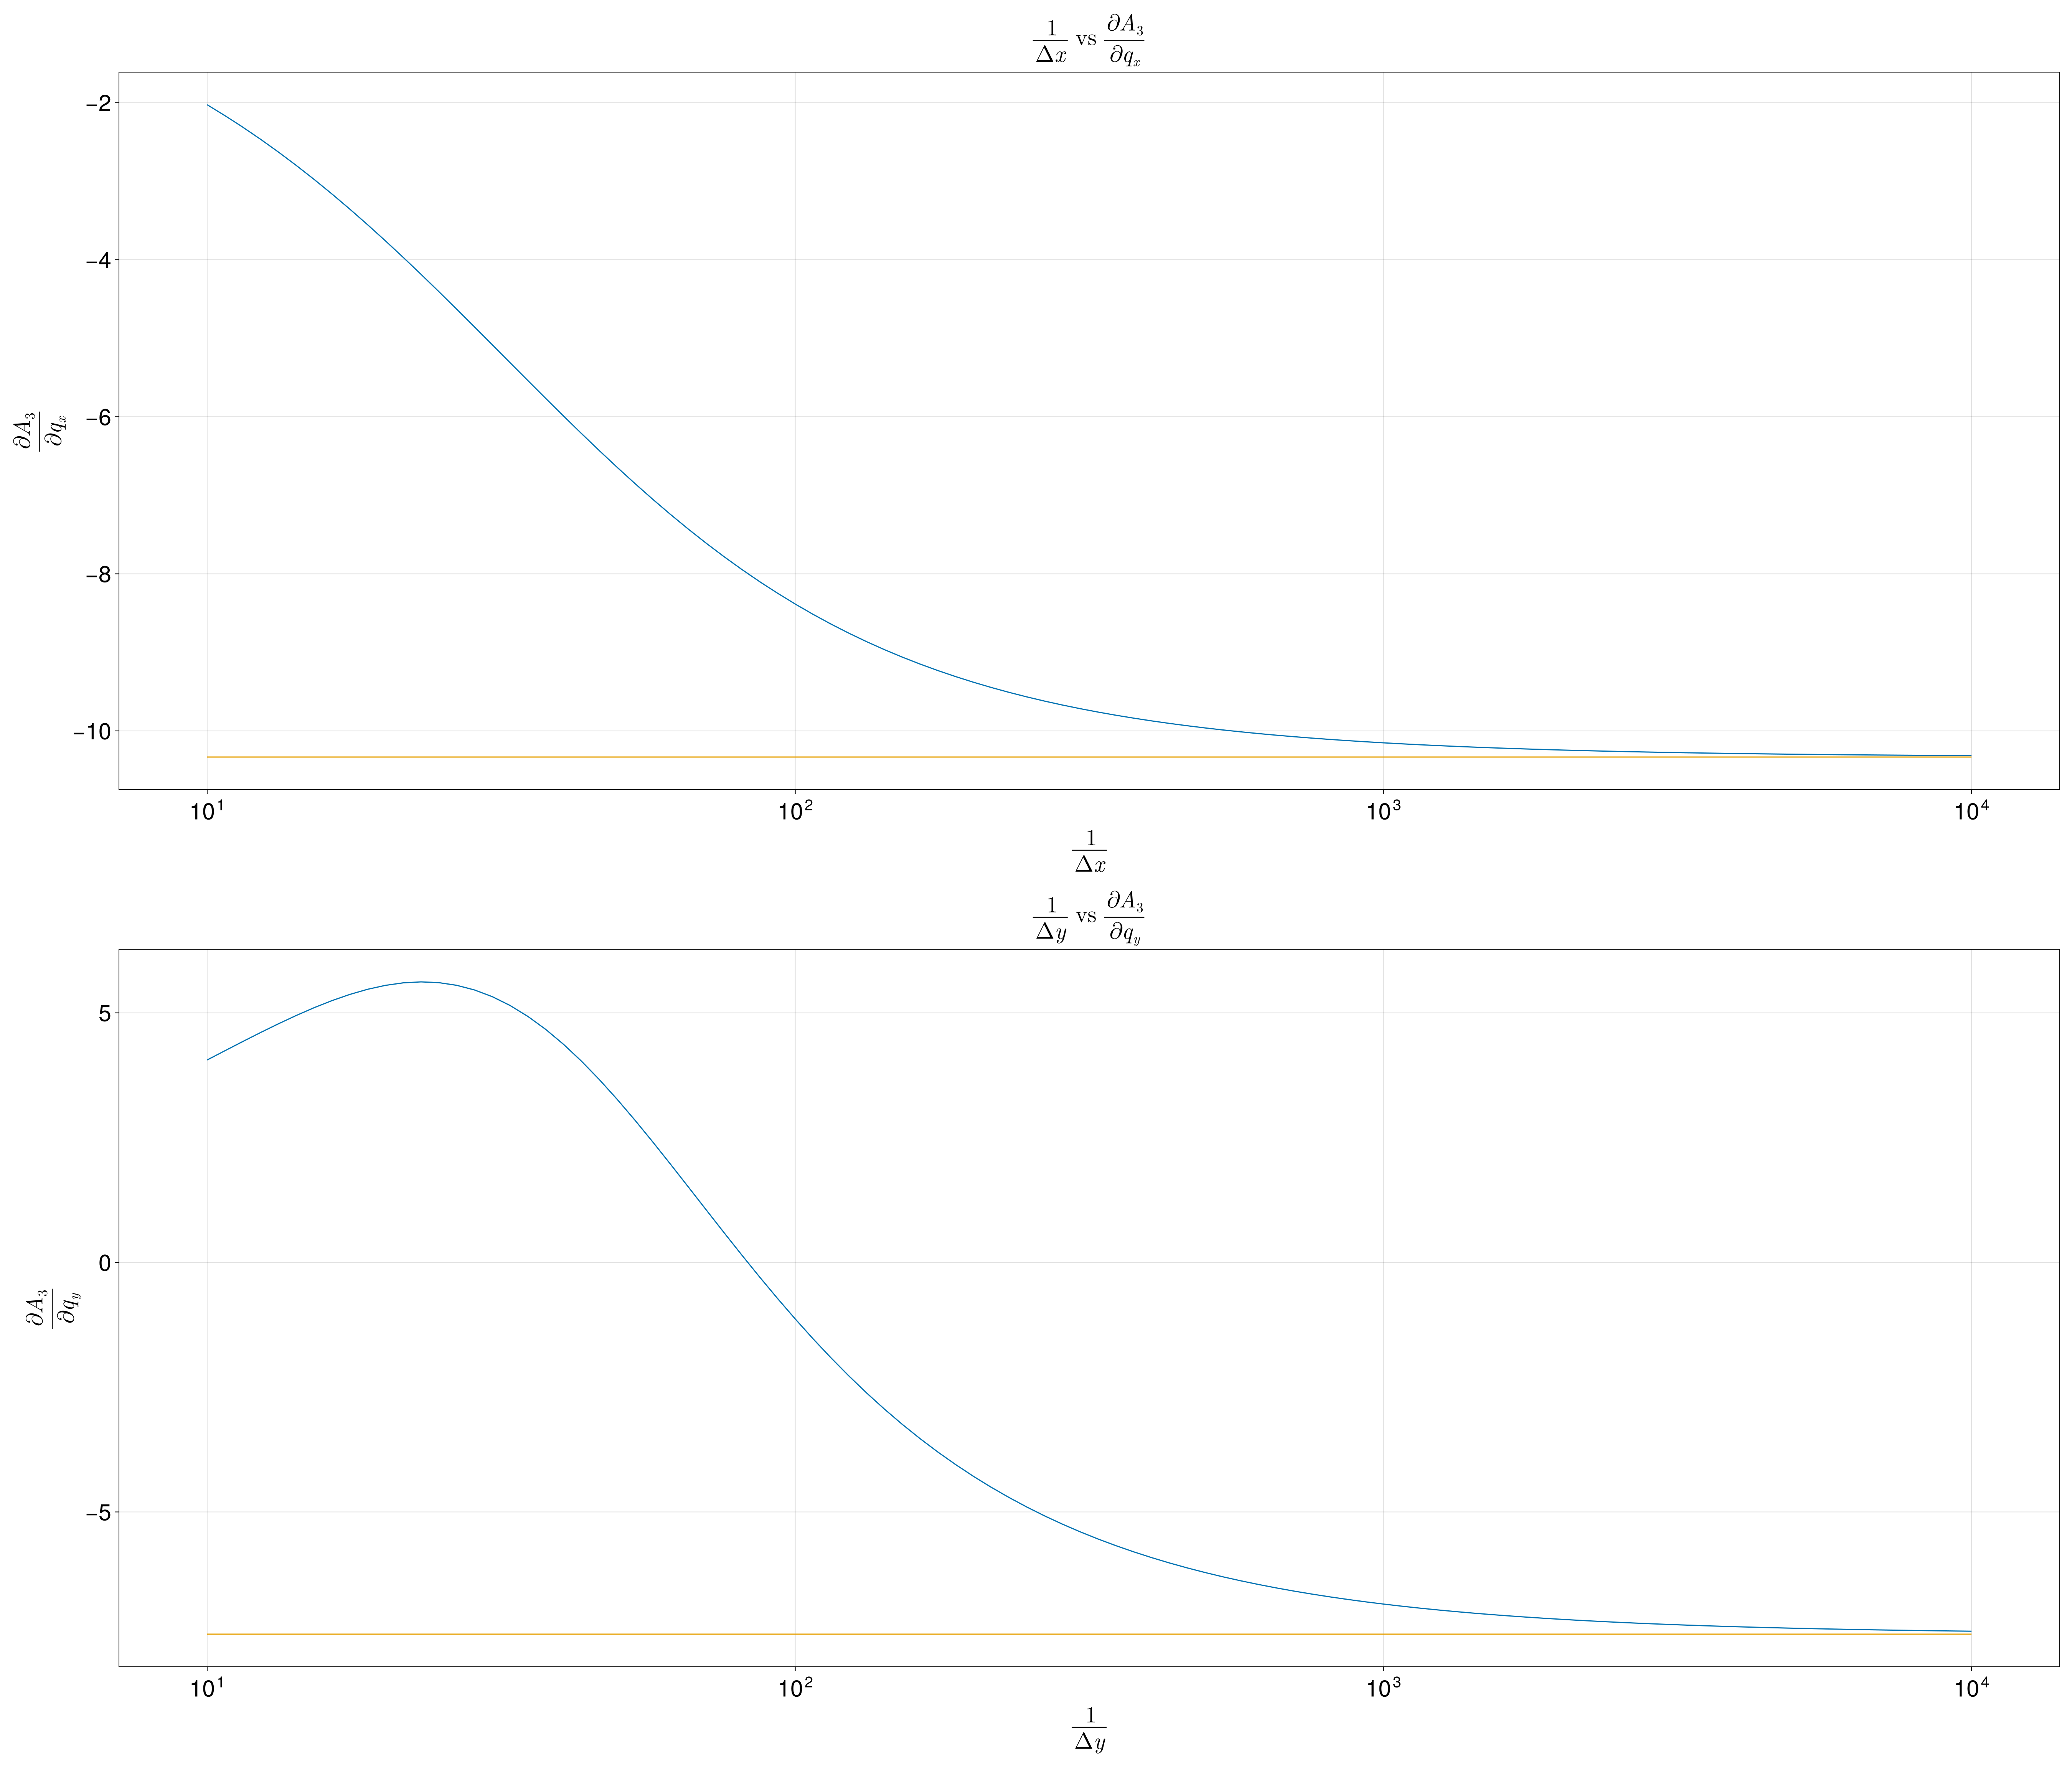

In [161]:
d_A3(delta, alpha, k, index)

In [162]:
function compute_A5(delta, alpha, k, index)
    x, y = k
    epsilon = analytic_eigenvalues(alpha, delta, x, y)[index]
    # convenience
    q = x + im*y
    omega = exp(im * 2 * pi/ 3)
    # variables
    f1 = delta + alpha * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = epsilon^6 + epsilon^4 * (abs2(f3) - 2 * abs2(f1) - 2 * abs2(f5)) - 2 * epsilon^3 * real(f1 * f3 * f5) + 
    epsilon^2 * (abs2(f1)^2 + abs2(f5)^2 + 2 * abs2(f1) * abs2(f5) - 2 * abs2(f1) * abs2(f3) + abs2(f3) * abs2(f5)) + 
    2 * epsilon * real(f1 * f3 * f5) * (abs2(f1) + abs2(f3) + abs2(f5)) + abs2(f1) * abs2(f3) * (abs2(f1) + abs2(f3) + abs2(f5))
    
    # eigenvector entries
    A5 = abs(f3) * (epsilon * f5 + conj(f1) * conj(f3))
    return A5 / sqrt(nmz)
end

compute_A5 (generic function with 1 method)

In [164]:
function d_A5(delta, alpha, k, index)
    A5_0 = compute_A5(delta, alpha, k, index)

    n_pts = 10^2
    log_dx_list = range(2, 5, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(2, 5, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)
    anal_nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = imag.((compute_A5(delta, alpha, k .+ [dx, 0], index) - A5_0) / dx)

        dy = 1/dy_list[j]
        nmz_list[j, 2] = imag.((compute_A5(delta, alpha, k .+ [0, dy], index) - A5_0) / dy)

        anal_nmz_list[j, 1], anal_nmz_list[j, 2] = imag.(analytic_d_A5(delta, alpha, index))

    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial A_5}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial A_5}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    lines!(ax1, dx_list, anal_nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial A_5}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial A_5}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    lines!(ax2, dy_list, anal_nmz_list[:, 2])
    P
end

d_A5 (generic function with 1 method)

In [165]:
delta = -omega + 1
alpha = 231 - 3im
k = [0.0, 0.0]
index = 1

1

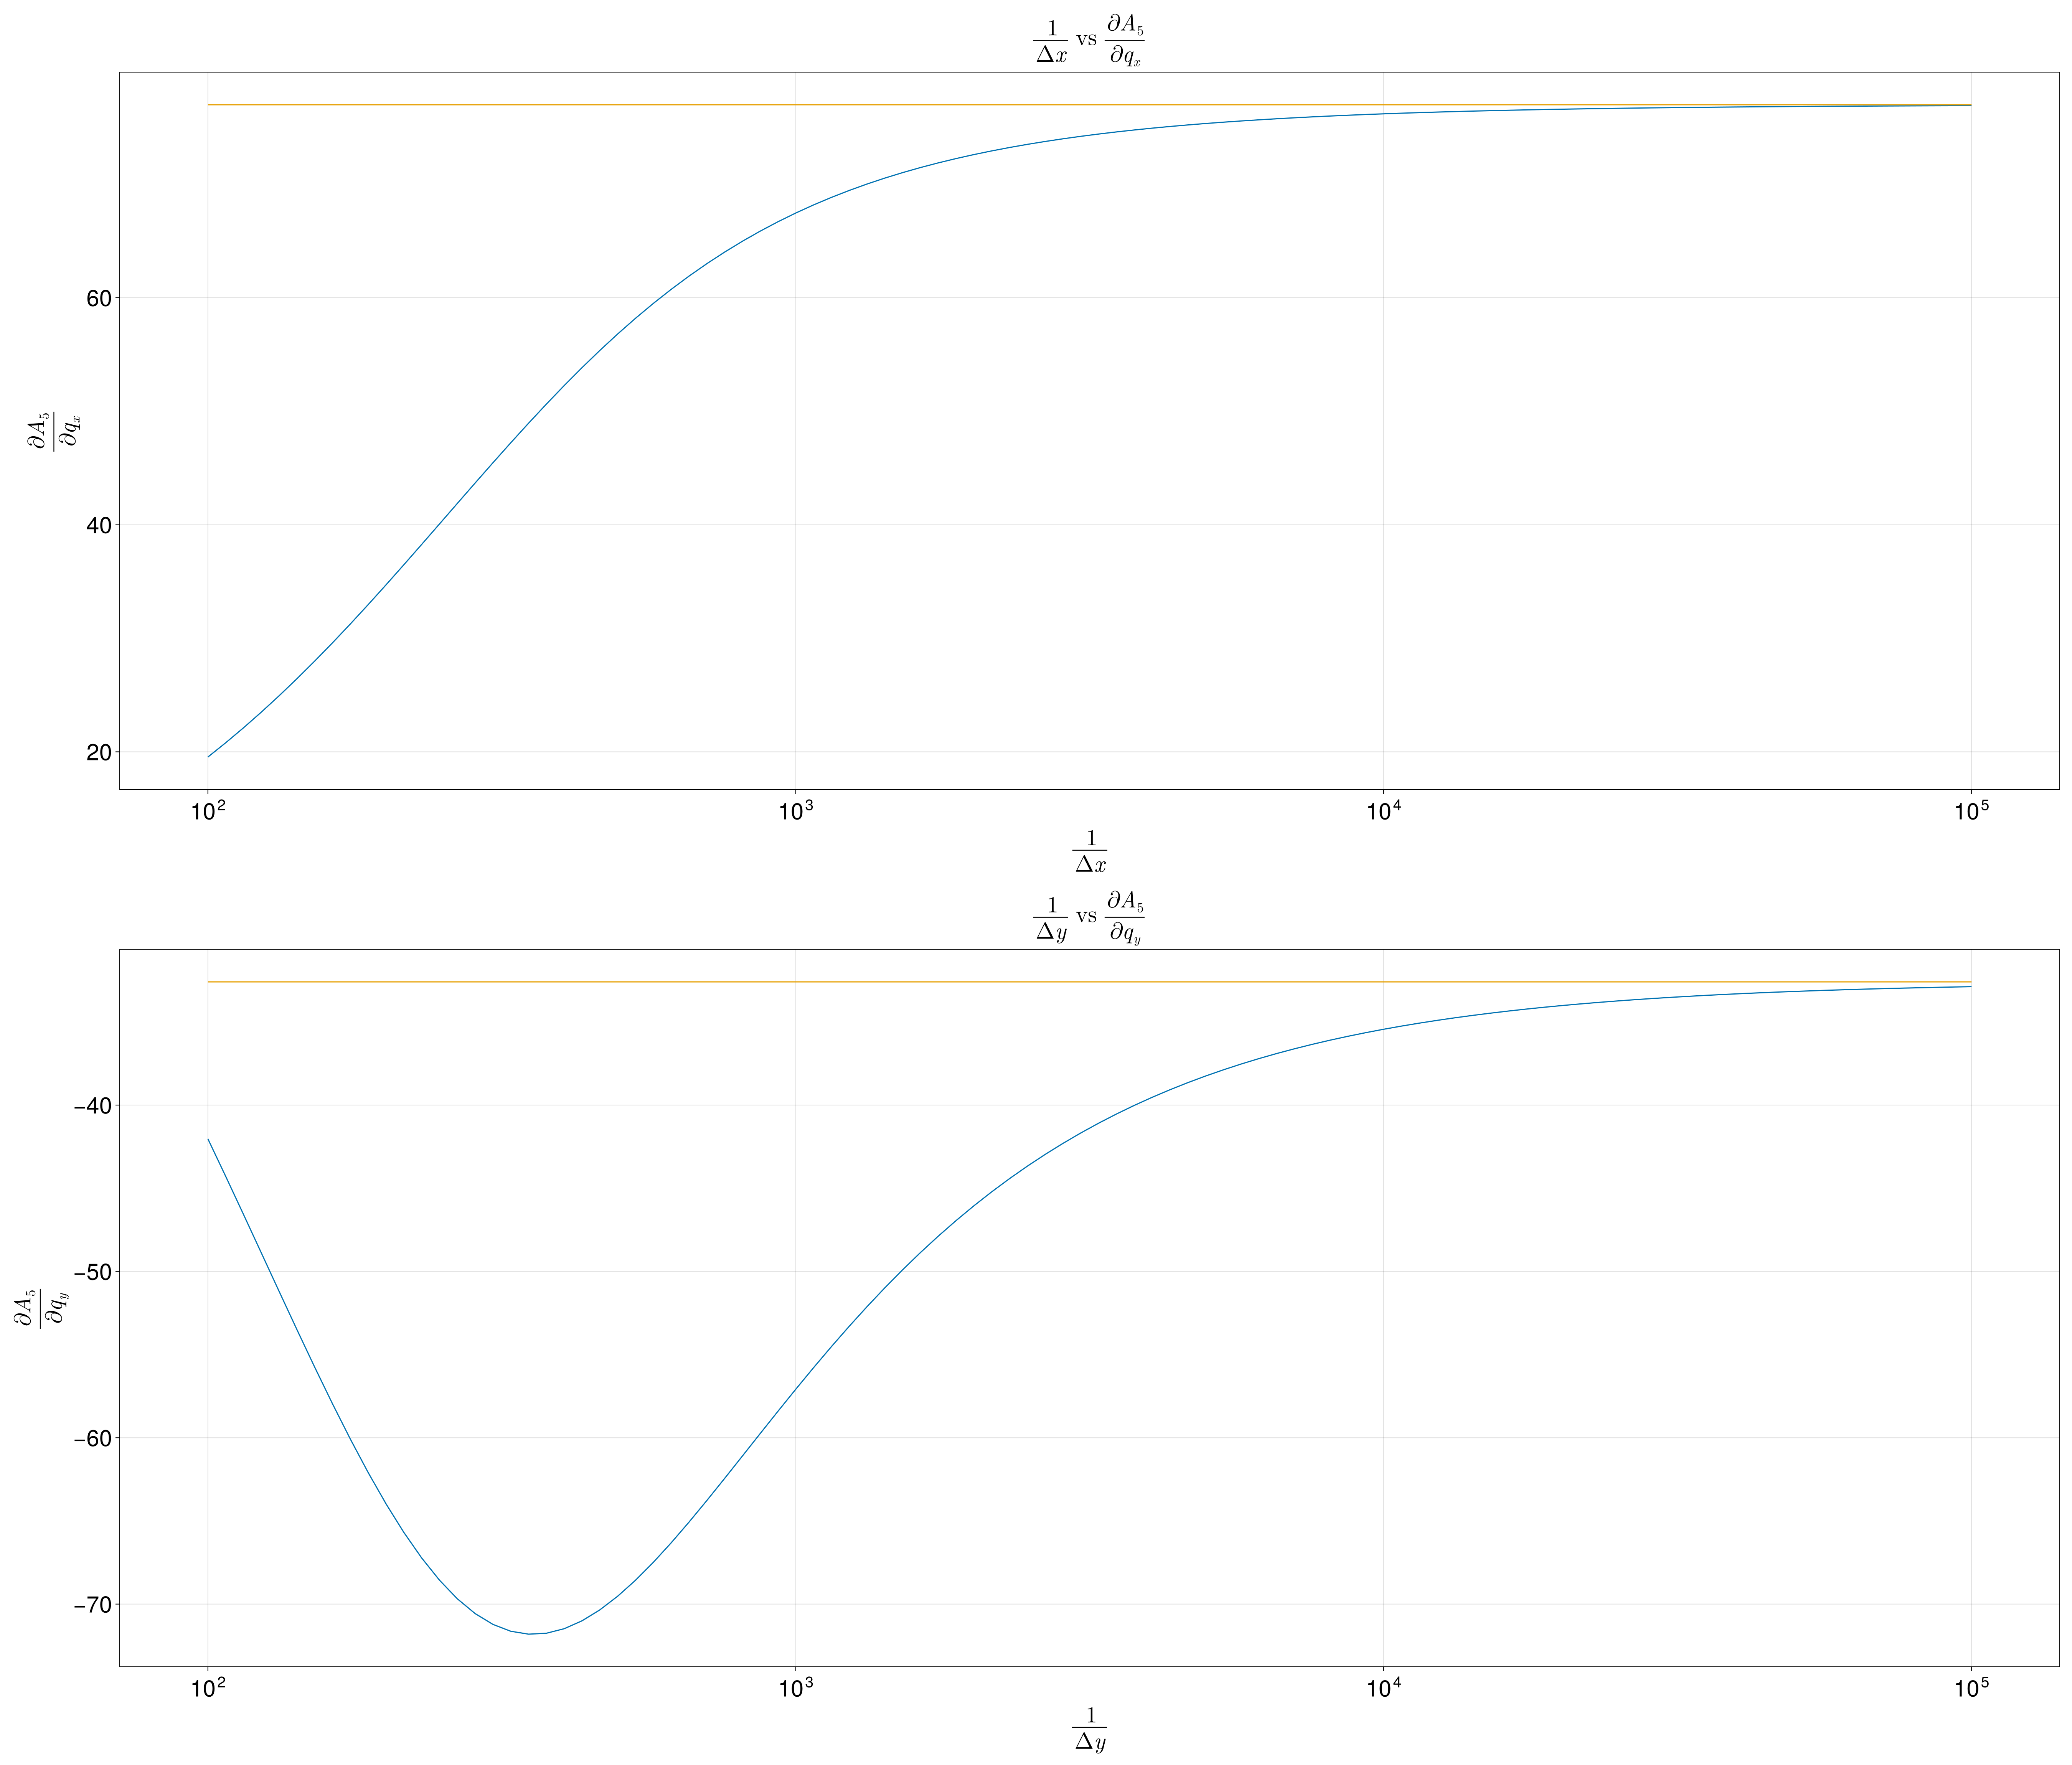

In [166]:
d_A5(delta, alpha, k, index)

<font size="12">$$\tilde{\Omega}(0,0)$$</font>

I want to check if the analytic and numeric Berry curvatures match up

In [7]:
function explicit_og_bc(delta, alpha, index)
    omega = exp(im * 2 * pi/ 3)
    k = index - 2
    
    nmz = (64 * real(omega^k * delta)^6 - 48 * abs2(delta) * real(omega^k * delta)^4 - 16 * real(delta^3) * real(omega^k * delta)^3 + 
    12 * abs2(delta)^2 * real(omega^k * delta)^2 + 12 * abs2(delta) * real(delta^3) * real(omega^k * delta) + 3 * abs2(delta)^3)
    
    return (-2*sqrt(3) * real(alpha * conj(delta))/nmz^2 * (48 * abs2(delta) * real(omega^k * delta)^2 - 12 * abs2(delta)^2) * 
    (imag(alpha * conj(delta))/(2 * abs2(delta)) * abs2(8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - delta^3) + 
    2 * real(alpha * conj(delta)) * real(omega^k * delta) * imag(delta^3)) + 
    4*sqrt(3)/nmz * real(alpha * conj(delta)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) + abs2(delta) * imag(alpha * conj(delta))) * 
    (12*abs2(delta)/nmz * real(omega^k * delta)^2 * (abs2(delta) - 4 * real(omega^k * delta)^2) + 1)
    )
end

explicit_og_bc (generic function with 1 method)

In [8]:
function explicit_k_v2(delta, alpha, index)
    k = index - 2
    if mod(k, 3) == 0
        return -8/(sqrt(3) * (delta^2 + conj(delta)^2 + abs(delta)^2)^2) * (imag(alpha) * imag(delta) + real(alpha) * real(delta)) * 
        (3 * imag(alpha) * real(delta) + imag(delta) * real(alpha))
    elseif mod(k, 3) == 1
        return (2/3) * (real(alpha)^2 / imag(delta)^2 + (-3 * imag(alpha)^2 + 2*sqrt(3) * imag(alpha) * real(alpha) - real(alpha)^2) / 
        (imag(delta) + sqrt(3) * real(delta))^2)
    elseif mod(k, 3) == 2
        return 2*(imag(alpha) * imag(delta) + real(alpha) * real(delta))/(3 * imag(delta)^2 * (imag(delta) - sqrt(3) * real(delta))^3) * 
        (3 * imag(alpha) * imag(delta)^2 - 3 * sqrt(3) * imag(delta) * (imag(alpha) + sqrt(3) * real(alpha)) * real(delta) + 
        sqrt(3) * (2 * imag(delta)^2 + 3 * real(delta)^2) * real(alpha))
    end
end

explicit_k_v2 (generic function with 1 method)

In [22]:
function numeric_patch_bc_index(points, spacing, vF, delt, alph, index)
    omega = exp(im * 2 * pi / 3)
    # index = 0, 1, 2 is the band-index I want
    band_index = 0
    if real(delt * omega^(index)) > real(delt * omega^(index + 1))
        band_index += 1
    end
    if real(delt * omega^(index)) > real(delt * omega^(index + 2))
        band_index += 1
    end
    berry_list = Array{Float64}(undef, size(points)[1])
    for i in 1:size(points)[1]
        # get flux through plaquette centered at point
        num_vertices = 4
        states = Array{ComplexF64}(undef, num_vertices, 3)
        x0 = points[i, 1]
        y0 = points[i, 2]
        for j in 1:num_vertices
            x_new = x0 + spacing * cos(2 * pi * (j - 1) / num_vertices)
            y_new = y0 + spacing * sin(2 * pi * (j - 1) / num_vertices)
            momentum = norm([x_new, y_new])
            theta = polar_angle(x_new, y_new)
            ham = H_mft(momentum, theta, delt, alph) + H_k(momentum, theta, vF)
            gs = eigvecs(Hermitian(ham))[:, band_index + 1]
            states[j, :] = gauge_fix(normalize(gs))
        end
        P = 1
        for j in 1:num_vertices
            if j < num_vertices
                temp = dot(states[j, :], states[j + 1, :])
                P *= temp
            else
                temp = dot(states[j, :], states[1, :])
                P *= temp
            end
            if temp != 0
                P /= abs(temp)
            end
        end
        if abs(imag(P)) < 10^(-16)
            berry_list[i] = -(angle(real(P))) / (area(spacing / sqrt(2), num_vertices))
        else
            berry_list[i] = -angle(P) / area(spacing / sqrt(2), num_vertices)
        end
    end
    return berry_list
end

numeric_patch_bc_index (generic function with 1 method)

In [262]:
function patch_bc_check_arg_delta(w, pd, delta_mag, alpha)
    n_pts = 10^2
    ang_list_1 = range(0, 2 * pi, n_pts)
    ang_list_2 = range(0, 2 * pi, n_pts)
    ang_list_3 = range(0, 2 * pi, n_pts)
    curvatures = Array{Float64}(undef, n_pts, 3, 3)
    errors = Array{Float64}(undef, n_pts, 3)
    spacing = 10^(-1) * (w / 2 / pd)
    grid = reshape([10^(-16), 10^(-16)], (1, 2))
    P = Figure(size=(1500, 1000), fontsize=30)
    for j in 1:n_pts
        delta = delta_mag * exp(im * ang_list_1[j])
        # curvatures[j, 1, 1] = analytic_og_bc(delta, alpha, 0)
        curvatures[j, 1, 2] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 1)[1]
        # curvatures[j, 1, 2] = bc_no_spinors(grid, spacing, 0, delta, alpha)[1]
        curvatures[j, 1, 3] = explicit_og_bc(delta, alpha, 0)
        # curvatures[j, 1, 3] = explicit_k_v2(delta, alpha, 0)
        if abs(curvatures[j, 1, 2]) > 10^8 || isnan(curvatures[j, 1, 3]) || isinf(curvatures[j, 1, 3])
            errors[j, 1] = NaN
        else
            errors[j, 1] = abs((curvatures[j, 1, 3] - curvatures[j, 1, 2]) / curvatures[j, 1, 3])
        end

        delta = delta_mag * exp(im * ang_list_2[j])
        # curvatures[j, 2, 1] = analytic_og_bc(delta, alpha, 2)
        # curvatures[j, 2, 2] = bc_no_spinors(grid, spacing, 0, delta, alpha)[1]
        curvatures[j, 2, 2] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 0)[1]
        curvatures[j, 2, 3] = explicit_og_bc(delta, alpha, 2)
        # curvatures[j, 2, 3] = explicit_k_v2(delta, alpha, 2)
        if abs(curvatures[j, 2, 2]) > 10^8 || isnan(curvatures[j, 2, 3]) || isinf(curvatures[j, 2, 3])
            errors[j, 2] = NaN
        else
            errors[j, 2] = abs((curvatures[j, 2, 3] - curvatures[j, 2, 2]) / curvatures[j, 2, 3])
        end

        delta = delta_mag * exp(im * ang_list_3[j])
        # curvatures[j, 3, 1] = analytic_og_bc(delta, alpha, 1)
        # curvatures[j, 3, 2] = bc_no_spinors(grid, spacing, 0, delta, alpha)[1]
        curvatures[j, 3, 2] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 2)[1]
        curvatures[j, 3, 3] = explicit_og_bc(delta, alpha, 1)
        # curvatures[j, 3, 3] = explicit_k_v2(delta, alpha, 1)
        if abs(curvatures[j, 3, 2]) > 10^8 || isnan(curvatures[j, 3, 3]) || isinf(curvatures[j, 3, 3])
            errors[j, 3] = NaN
        else
            errors[j, 3] = abs((curvatures[j, 3, 3] - curvatures[j, 3, 2]) / curvatures[j, 3, 3])
        end
    end
    # ax1 = Axis(P[1, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    # xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    # lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 2], label = "numeric")
    # lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 1], label = "anal")
    # lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 3], label = "explicit")
    # P[1, 2] = Legend(P, ax1, framevisible = true)

    ax5 = Axis(P[1, 1], 
    title = L"\text{log_{10}}[\delta \tilde{\Omega}_k(0, 0)] \text{ vs }  \frac{1}{\pi}\text{arg} (\Delta)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\text{log_{10}}[\delta \tilde{\Omega}_k]")
    lines!(ax5, 1/pi .* ang_list_2, log10.(errors[:, 1]), label = L"k = 0")
    lines!(ax5, 1/pi .* ang_list_1, log10.(errors[:, 3]), label = L"k = 1")
    lines!(ax5, 1/pi .* ang_list_3, log10.(errors[:, 2]), label = L"k = 2")
    P[1, 2] = Legend(P, ax5, framevisible = true)

    

    # ax2 = Axis(P[2, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    # xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    # lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 2], label = "numeric")
    # lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 1], label = "anal")
    # lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 3], label = "explicit")
    # P[2, 2] = Legend(P, ax2, framevisible = true)

    
    
    # ax3 = Axis(P[3, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    # xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    # lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 2], label = "numeric")
    # lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 1], label = "anal")
    # lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 3], label = "explicit")
    # P[3, 2] = Legend(P, ax3, framevisible = true)
    
    P
end

patch_bc_check_arg_delta (generic function with 1 method)

In [20]:
# general parameters
pd = 50
mbz_kappa = 1
w = 10^(-1) * mbz_kappa

0.1

In [272]:
alpha = 40 * exp(im * 12 * pi/7)

24.939592074349335 - 31.273259298721197im

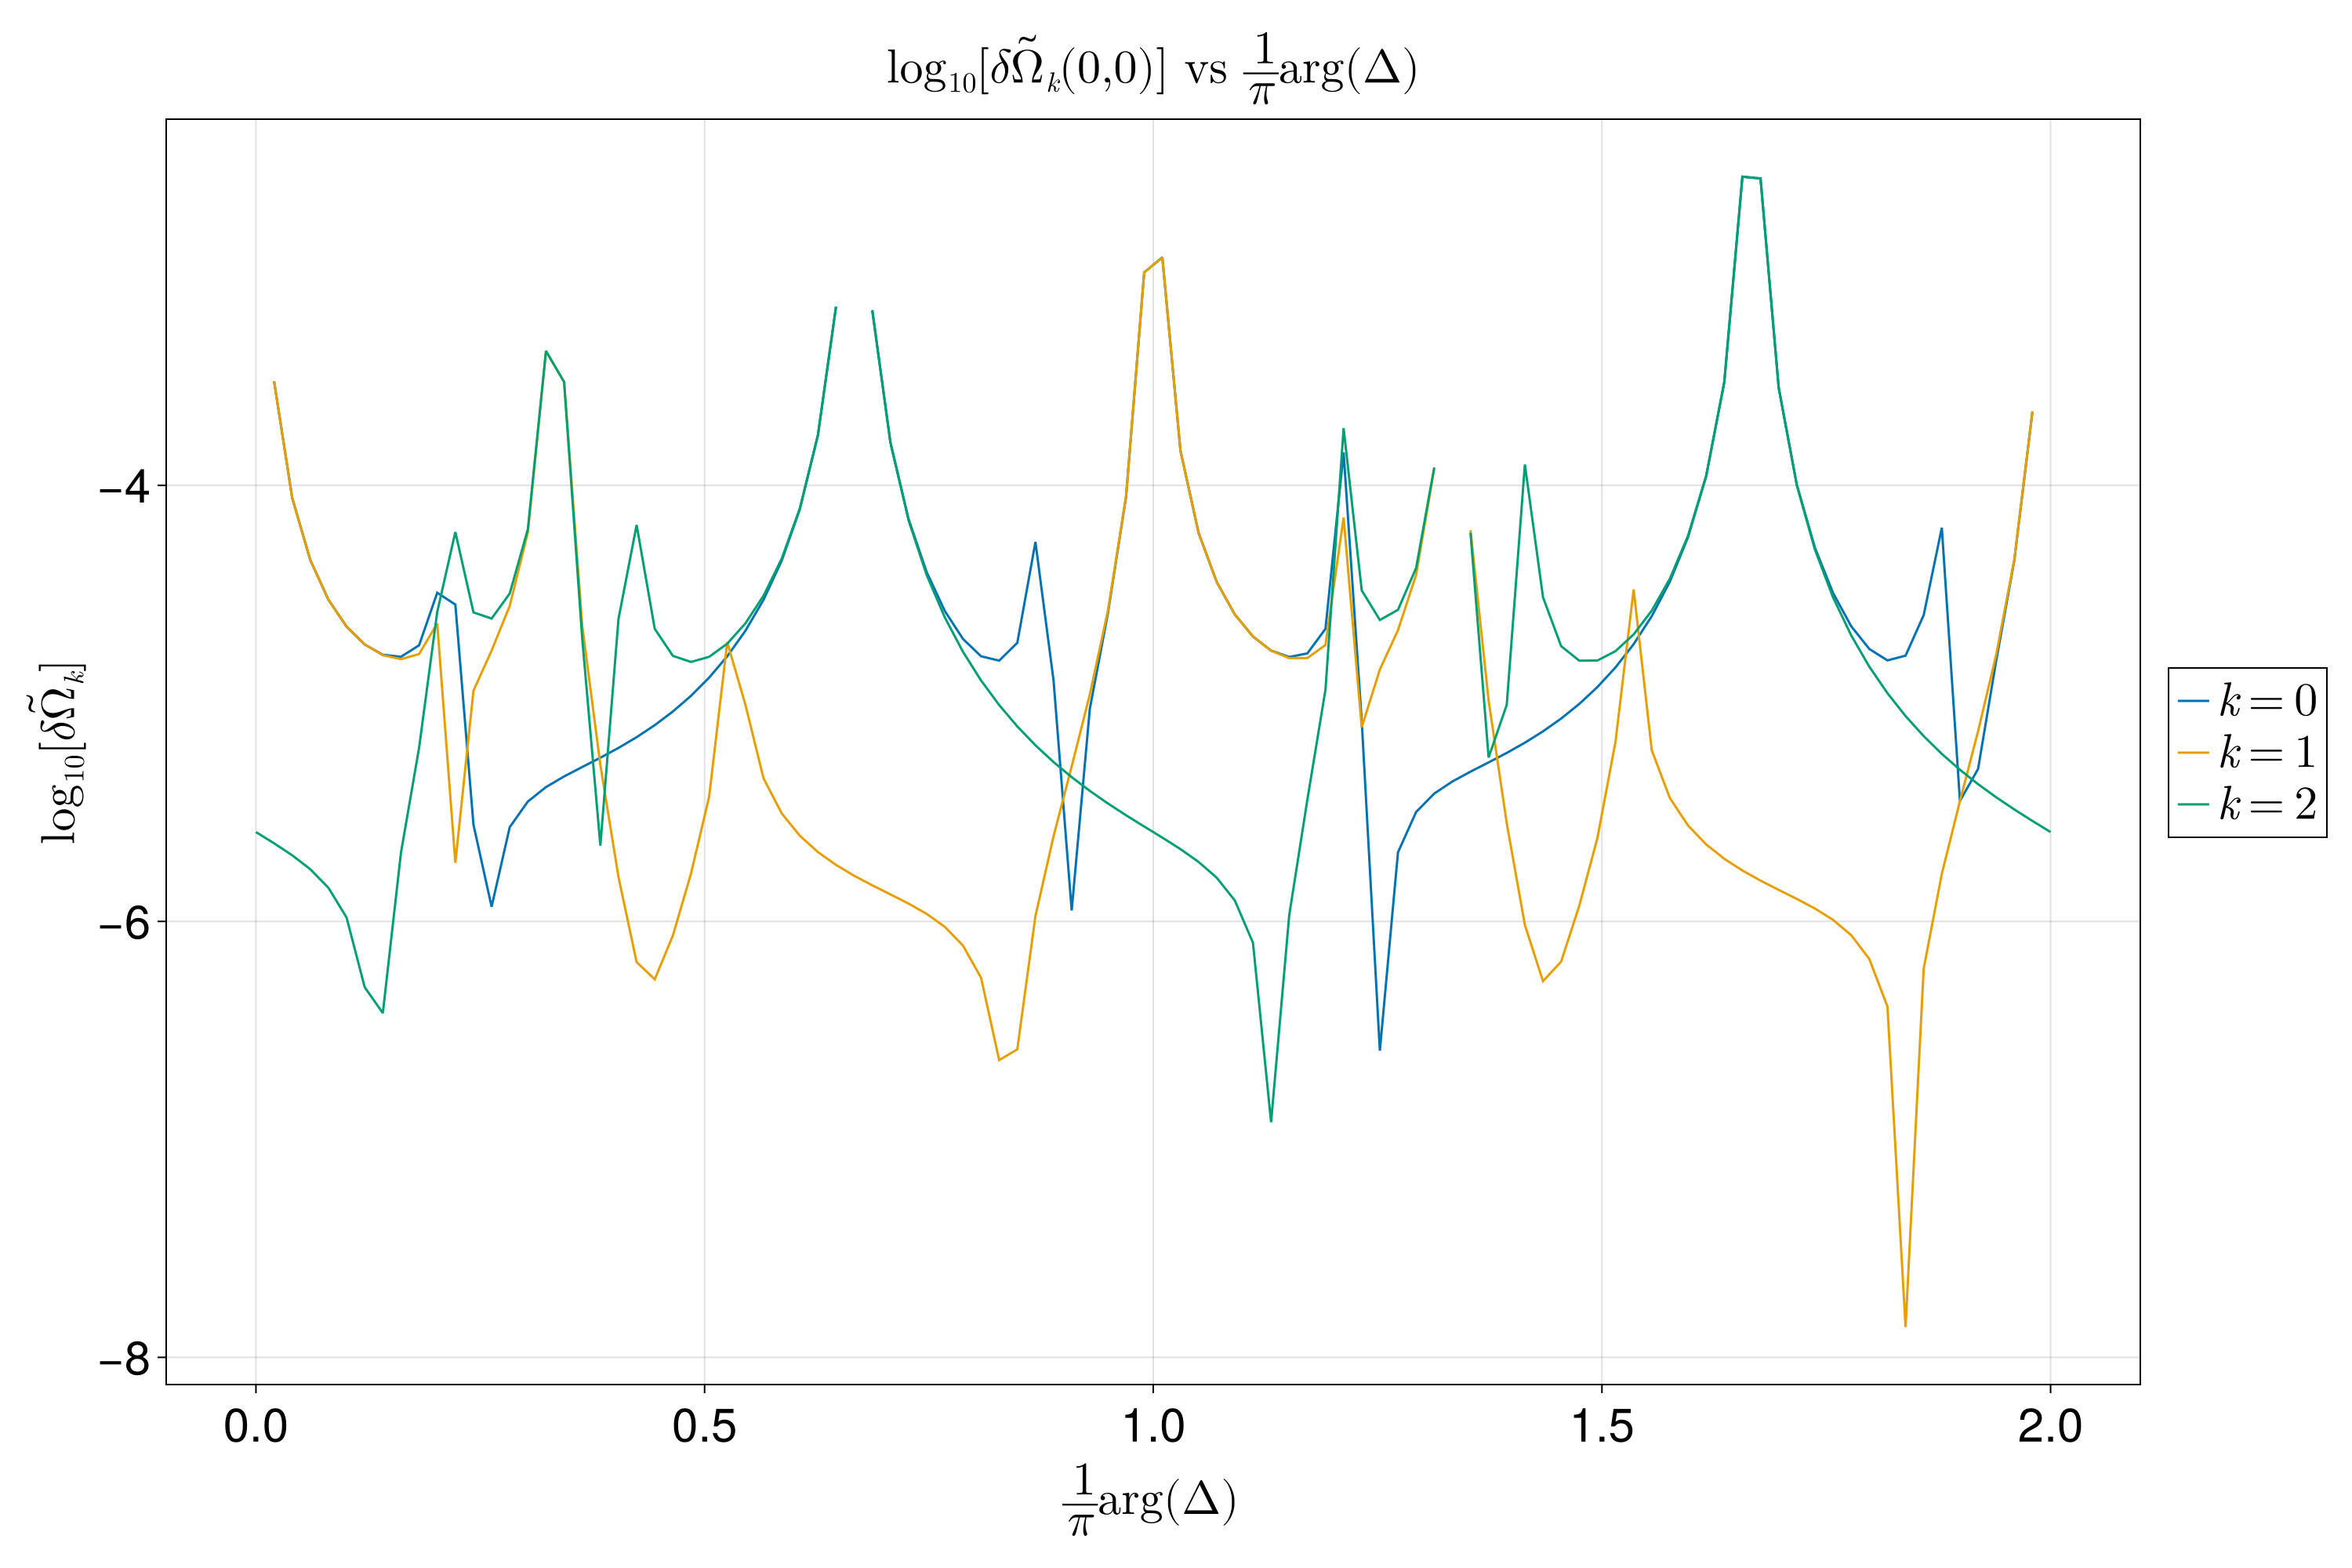

In [273]:
patch_bc_check_arg_delta(w, pd, 1, alpha)

In [62]:
function explicit_og_bc_v1(delta, alpha, index)
    k = index - 2
    alpha = alpha
    if mod(k, 3) == 0
        return -8/(sqrt(3) * (delta^2 + conj(delta)^2 + abs(delta)^2)^2) * (imag(alpha) * imag(delta) + real(alpha) * real(delta)) * 
        (3 * imag(alpha) * real(delta) + imag(delta) * real(alpha))
    elseif mod(k, 3) == 1
        return (2/3) * (real(alpha)^2 / imag(delta)^2 + (-3 * imag(alpha)^2 + 2*sqrt(3) * imag(alpha) * real(alpha) - real(alpha)^2) / 
        (imag(delta) + sqrt(3) * real(delta))^2)
    elseif mod(k, 3) == 2
        return 2*(imag(alpha) * imag(delta) + real(alpha) * real(delta))/(3 * imag(delta)^2 * (imag(delta) - sqrt(3) * real(delta))^3) * 
        (3 * imag(alpha) * imag(delta)^2 - 3 * sqrt(3) * imag(delta) * (imag(alpha) + sqrt(3) * real(alpha)) * real(delta) + 
        sqrt(3) * (2 * imag(delta)^2 + 3 * real(delta)^2) * real(alpha))
    end
end

explicit_og_bc_v1 (generic function with 1 method)

In [65]:
function patch_bc_check_contour(w, pd, mag)
    n_pts = 10^2
    ang_list = range(0, 2 * pi, n_pts)
    angle_grid = mesh_grid(ang_list, ang_list, Float64)
    curvatures = Array{Float64}(undef, size(angle_grid, 1), 3, 2)
    errors = Array{Float64}(undef, size(angle_grid, 1), 3)
    spacing = 10^(-2) * (w / 2 / pd)
    grid = reshape([0.0, 0.0], (1, 2))
    for j in 1:size(angle_grid, 1)
        delta = 1 * exp(im * angle_grid[j, 1])
        alpha = mag * exp(im * angle_grid[j, 2])

        curvatures[j, 1, 1] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 1)[1]
        curvatures[j, 1, 2] = explicit_og_bc_v1(delta, alpha, 0)

        curvatures[j, 2, 1] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 0)[1]
        curvatures[j, 2, 2] = explicit_og_bc_v1(delta, alpha, 2)

        curvatures[j, 3, 1] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 2)[1]
        curvatures[j, 3, 2] = explicit_og_bc_v1(delta, alpha, 1)

        for i in 1:3
            if abs(curvatures[j, i, 1]) > 10^8 || isnan(curvatures[j, i, 2]) || isinf(curvatures[j, i, 2])
                errors[j, i] = NaN
            else
                errors[j, i] = log10(abs((curvatures[j, i, 2] - curvatures[j, i, 1]) / curvatures[j, i, 1]))
            end
        end
    end
    dex = 3
    valid_mask = isfinite.(errors[:, dex])
    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}}[\delta \tilde{\Omega}_2(0, 0)] \text{ vs } \frac{1}{\pi} (\text{arg} [\Delta], \text{arg} [\alpha])", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\frac{1}{\pi}\text{arg} (\alpha)")
    tricontourf!(ax1, 1/pi * angle_grid[valid_mask, 1], 1/pi * angle_grid[valid_mask, 2], errors[valid_mask, dex], colormap = :RdBu)
    tr1 = tricontourf!(ax1, 1/pi * angle_grid[valid_mask, 1], 1/pi * angle_grid[valid_mask, 2], errors[valid_mask, dex], colormap = :RdBu)
    cb1 = Colorbar(fig[1, 2], tr1)
    
    fig
end

patch_bc_check_contour (generic function with 1 method)

In [66]:
patch_bc_check_contour(w, pd, 1098)

DomainError: DomainError with -8.881784197001252e-16:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [52]:
function check_mag_scaling(w, pd, d_ang, a_ang)
    n_pts = 10^3
    delta = exp(im * d_ang)
    mag_list = range(0.0, 10^2, n_pts)
    curvatures = Array{Float64}(undef, n_pts, 3, 2)
    errors = Array{Float64}(undef, n_pts, 3)
    spacing = 10^(-2) * (w / 2 / pd)
    grid = reshape([0.0, 0.0], (1, 2))
    for j in 1:n_pts
        alpha = mag_list[j] * exp(im * a_ang)
        
        curvatures[j, 1, 1] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 1)[1]
        curvatures[j, 1, 2] = explicit_og_bc_v1(delta, alpha, 0)

        curvatures[j, 2, 1] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 0)[1]
        curvatures[j, 2, 2] = explicit_og_bc_v1(delta, alpha, 2)

        curvatures[j, 3, 1] = numeric_patch_bc_index(grid, spacing, 0, delta, alpha, 2)[1]
        curvatures[j, 3, 2] = explicit_og_bc_v1(delta, alpha, 1)
        
        for i in 1:3
            if abs(curvatures[j, i, 1]) > 10^8 || isnan(curvatures[j, i, 2]) || isinf(curvatures[j, i, 2])
                errors[j, i] = NaN
            else
                errors[j, i] = log10(abs((curvatures[j, i, 2] - curvatures[j, i, 1]) / curvatures[j, i, 1]))
            end
        end
    end
    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}}[\delta \tilde{\Omega}_k(0, 0)] \text{ vs } | \frac{\alpha}{\Delta} |", 
    xlabel = L"|\frac{\alpha}{\Delta}|", ylabel = L"\text{log_{10}}[\delta \tilde{\Omega}_k(0, 0)]")
    lines!(ax1, mag_list, errors[:, 1], label = L"k = 1")
    lines!(ax1, mag_list, errors[:, 2], label = L"k = 0")
    lines!(ax1, mag_list, errors[:, 3], label = L"k = 2")
    fig[1, 2] = Legend(fig, ax1, framevisible = true)
    fig
end

check_mag_scaling (generic function with 1 method)

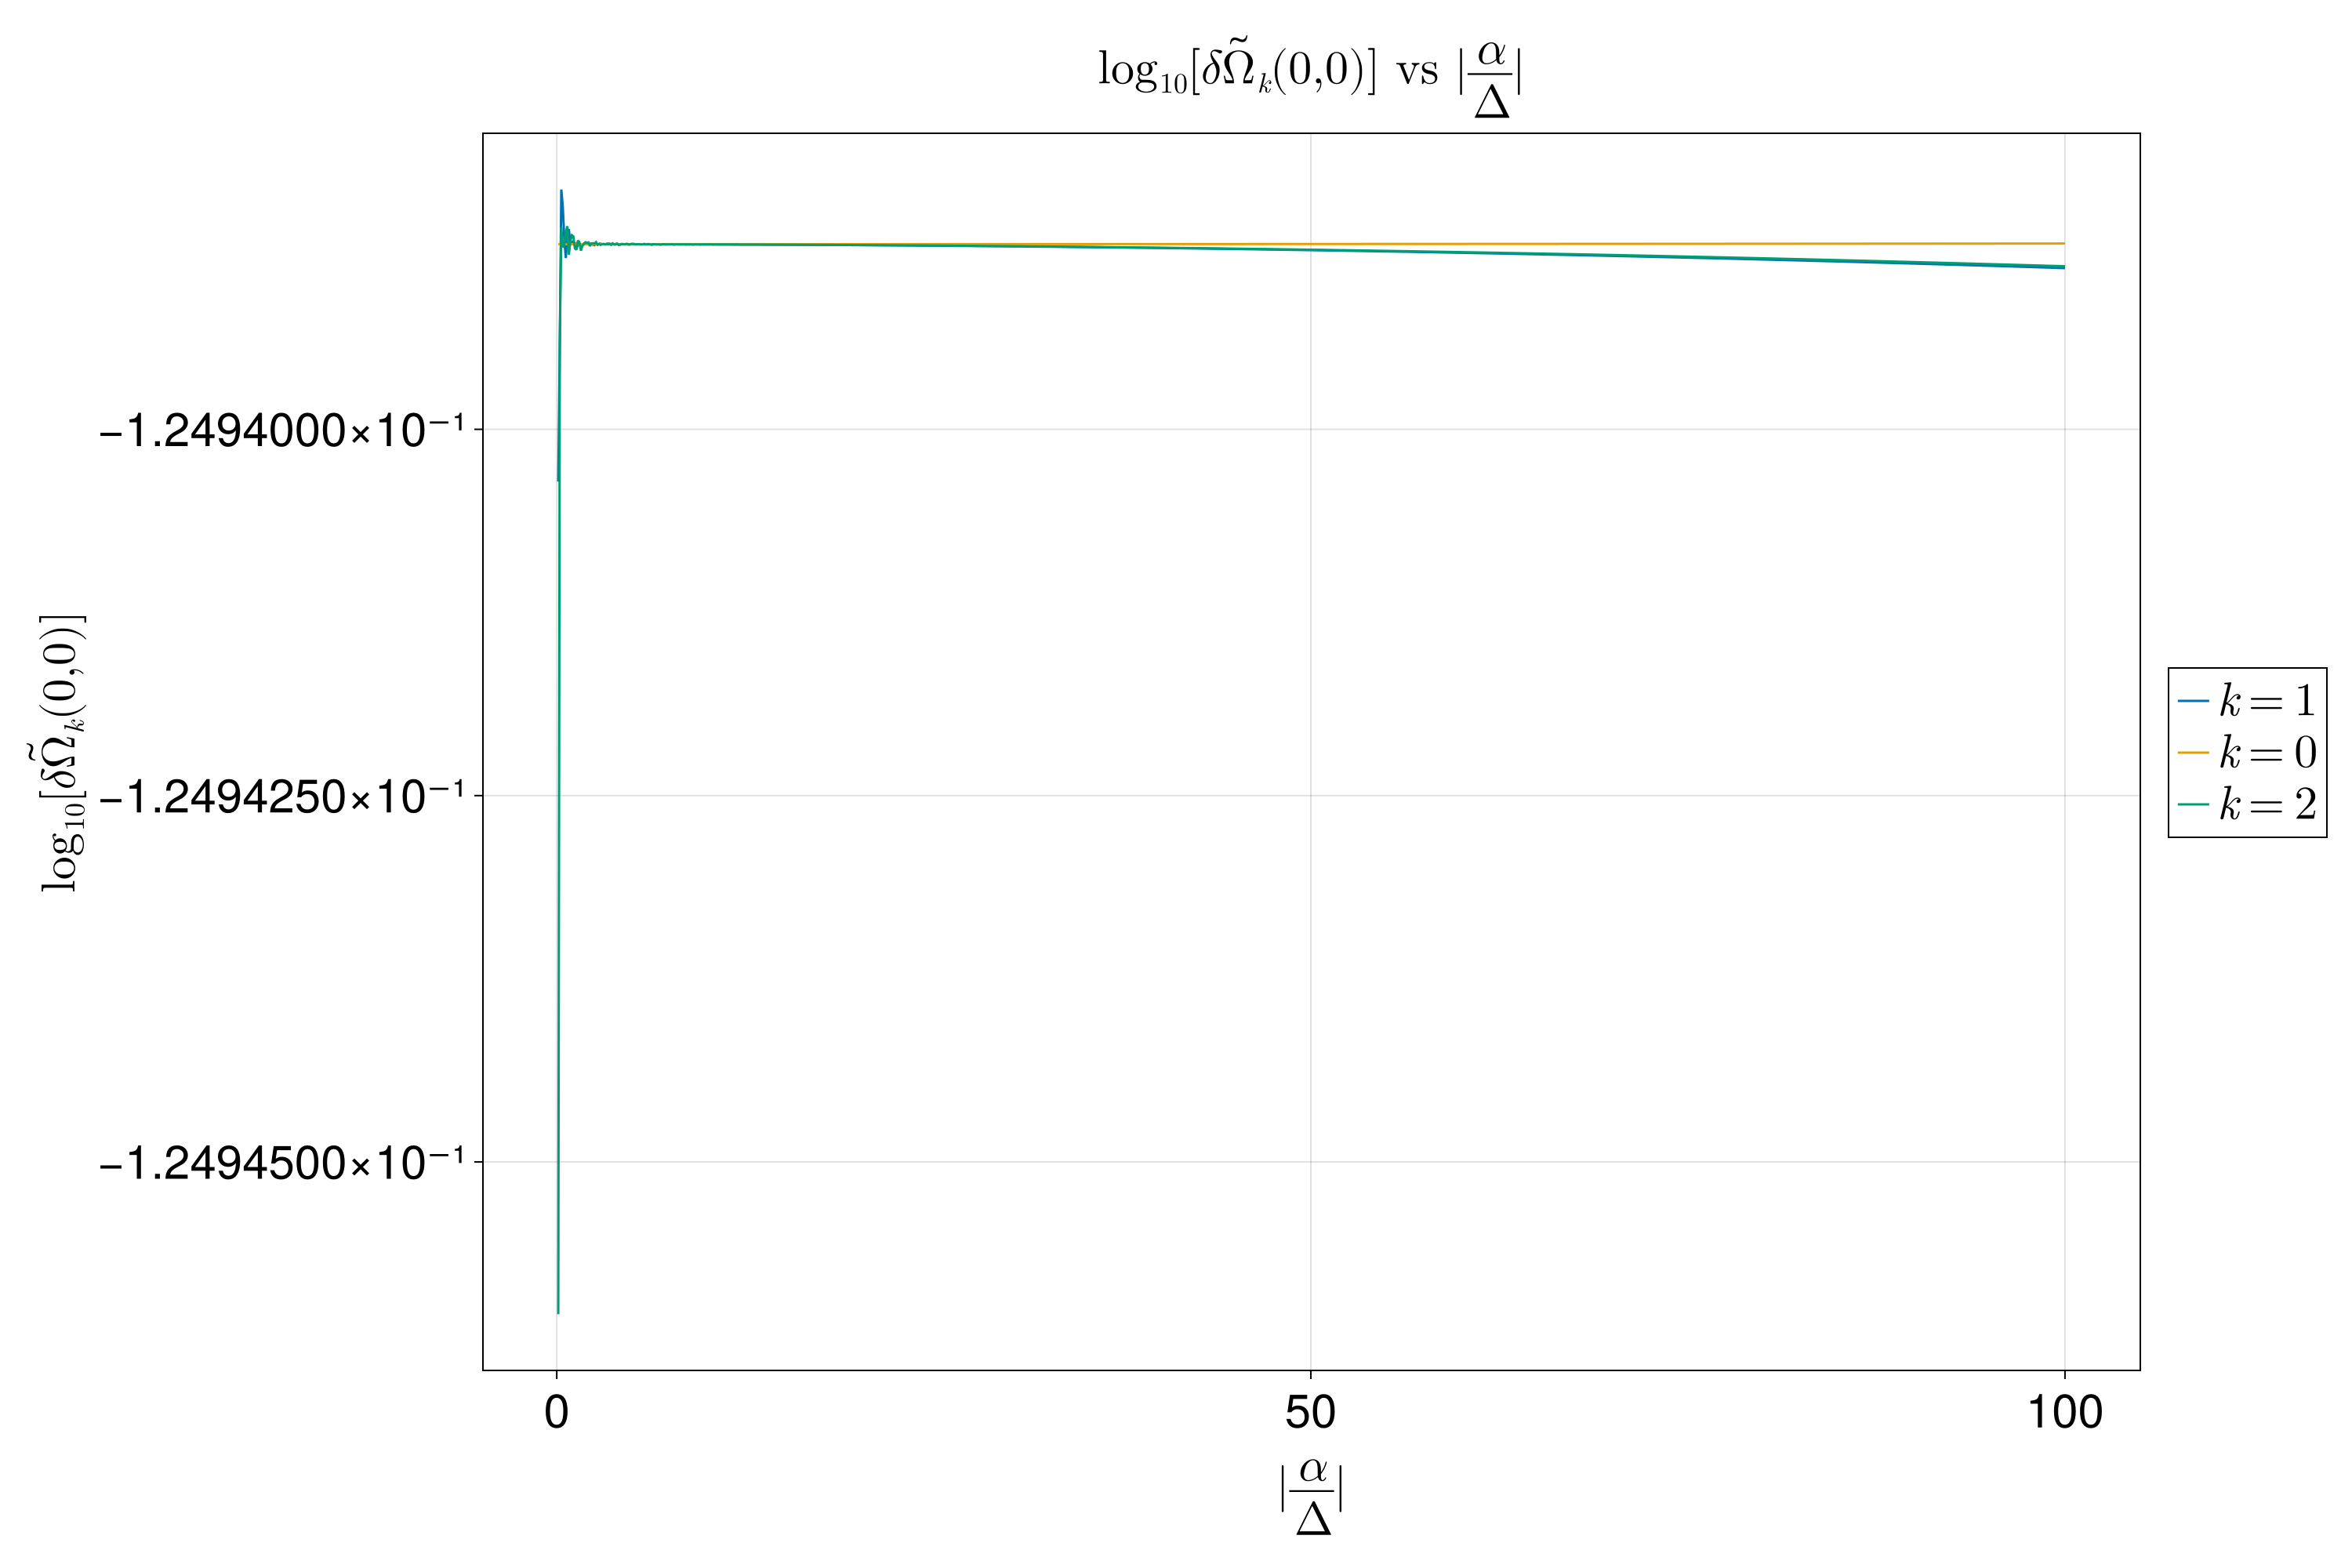

In [55]:
check_mag_scaling(w, pd, 6*pi/7, 11*pi/9)

<font size="12">$$\text{Im} [(\partial_{q_x} \bar{A}_3) (\partial_{q_y} A_3)]$$</font>

I want to check if my closed-form expression for analytic Berry curvature matches with the numerics.

In [160]:
function analytic_A3_term(delta, alpha, index)
    omega = exp(im * 2 * pi/ 3)
    k = index - 2
    
    nmz = (64 * real(omega^k * delta)^6 - 48 * abs2(delta) * real(omega^k * delta)^4 - 16 * real(delta^3) * real(omega^k * delta)^3 + 
    12 * abs2(delta)^2 * real(omega^k * delta)^2 + 12 * abs2(delta) * real(delta^3) * real(omega^k * delta) + 3 * abs2(delta)^3)

    term_x1 = -1/sqrt(nmz) * (delta/(2 * nmz * abs(delta)) * (-96 * real(omega^k * delta)^4 * real(alpha * conj(delta)) + 
    6 * abs2(delta)^2 * real(alpha * conj(delta))) * (8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - delta^3))

    term_x2 = 1/sqrt(nmz) * ((delta/abs(delta)^3 * real(alpha * conj(delta)) - alpha/abs(delta)) * 
    (8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - delta^3))

    term_x3 = 1/sqrt(nmz) * (-4 * delta / abs(delta) * real(omega^k * delta) * real(alpha * conj(delta)))

    term_y1 = 1/sqrt(nmz) * (-conj(delta)/(2 * nmz * abs(delta)) * (-96 * sqrt(3) * real(omega^k * delta)^4 * real(conj(delta) * alpha) + 
    48 * sqrt(3) * abs2(delta) * real(omega^k * delta)^2 * real(conj(delta) * alpha) - 
    6 * sqrt(3) * abs2(delta)^2 * real(conj(delta) * alpha)) * (8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - 
    conj(delta)^3))

    term_y2 = 1/sqrt(nmz) * ((sqrt(3) * conj(delta) / abs(delta)^3 * real(conj(delta) * alpha) - conj(alpha) * sqrt(3) / abs(delta)) * 
    (8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - conj(delta)^3))

    term_y3 = 1/sqrt(nmz) * (-4 * sqrt(3) * conj(delta) / abs(delta) * real(omega^k * delta) * real(conj(delta) * alpha))

    dxA3, dyA3 = analytic_d_A3(delta, alpha, index)
    return imag(conj(dxA3) * dyA3)
    # return imag(term_x1 * term_y2 + term_x1 * term_y3 + term_x2 * term_y1 + term_x2 * term_y3 + term_x3 * term_y1 + term_x3 * term_y2)
 
end

analytic_A3_term (generic function with 1 method)

In [161]:
function explicit_A3_term(delta, alpha, index)
    omega = exp(im * 2 * pi/ 3)
    k = index - 2
    
    nmz = (64 * real(omega^k * delta)^6 - 48 * abs2(delta) * real(omega^k * delta)^4 - 16 * real(delta^3) * real(omega^k * delta)^3 + 
    12 * abs2(delta)^2 * real(omega^k * delta)^2 + 12 * abs2(delta) * real(delta^3) * real(omega^k * delta) + 3 * abs2(delta)^3)

    term1 = -sqrt(3) * imag(alpha * conj(delta)) * real(alpha * conj(delta)) /(2 * nmz^2 * abs2(delta)) * 
    (-96 * real(omega^k * delta)^4 + 6 * abs2(delta)^2) * abs2(8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - 
    delta^3)

    term2 = -2*sqrt(3)/nmz^2 * real(alpha * conj(delta))^2 * real(omega^k * delta) * imag(delta^3) * 
    (-96 * real(omega^k * delta)^4 + 6 * abs2(delta)^2)

    term3 = sqrt(3) * imag(alpha * conj(delta)) * real(alpha * conj(delta))/(2 * nmz^2 * abs2(delta)) * 
    (-96 * real(omega^k * delta)^4 + 48 * abs2(delta) * real(omega^k * delta)^2 - 6 * abs2(delta)^2) * 
    abs2(8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - delta^3)

    term4 = 4*sqrt(3)/(abs2(delta) * nmz) * real(omega^k * delta) * real(alpha * conj(delta)) * imag(alpha * conj(delta)) * 
    (8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - real(delta^3))

    term5 = 2*sqrt(3)/nmz^2 * real(omega^k * delta) * real(alpha * conj(delta))^2 * imag(delta^3) * 
    (-96 * real(omega^k * delta)^4 + 48 * abs2(delta) * real(omega^k * delta)^2 - 6 * abs2(delta)^2)

    term6 = 4*sqrt(3)/(nmz * abs2(delta)) * real(omega^k * delta) * real(alpha * conj(delta)) * imag(delta * conj(alpha)) * 
    (8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - real(delta^3))

    # return term1 + term2 + term3 + term4 + term5 + term6

    final_term = sqrt(3) * real(alpha * conj(delta))/nmz^2 * (48 * abs2(delta) * real(omega^k * delta)^2 - 12 * abs2(delta)^2) * 
    (imag(alpha * conj(delta))/(2 * abs2(delta)) * abs2(8 * real(omega^k * delta)^3 - 4 * abs2(delta) * real(omega^k * delta) - delta^3) + 
    2 * real(alpha * conj(delta)) * real(omega^k * delta) * imag(delta^3))
    return final_term
end

explicit_A3_term (generic function with 1 method)

In [162]:
function check_A3_term(delta_mag, alpha)
    n_pts = 10^2
    ang_list_1 = range(0 + 0.1, 2*pi/3 - 0.1, n_pts)
    ang_list_2 = range(2*pi/3 + 0.1, 4*pi/3 - 0.1, n_pts)
    ang_list_3 = range(4*pi/3 + 0.1, 2*pi - 0.1, n_pts)
    curvatures = Array{Float64}(undef, n_pts, 3, 2)
    errors = Array{Float64}(undef, n_pts, 3)
    P = Figure(size=(2000, 1400), fontsize=30)
    for j in 1:n_pts
        delta = delta_mag * exp(im * ang_list_1[j])
        curvatures[j, 1, 1] = analytic_A3_term(delta, alpha, 0)
        curvatures[j, 1, 2] = explicit_A3_term(delta, alpha, 0)
        errors[j, 1] = 10^2 * abs(curvatures[j, 1, 1] - curvatures[j, 1, 2]) / curvatures[j, 1, 2]

        delta = delta_mag * exp(im * ang_list_2[j])
        curvatures[j, 2, 1] = analytic_A3_term(delta, alpha, 2)
        curvatures[j, 2, 2] = explicit_A3_term(delta, alpha, 2)
        errors[j, 2] = 10^2 * abs(curvatures[j, 2, 1] - curvatures[j, 2, 2]) / curvatures[j, 2, 2]

        delta = delta_mag * exp(im * ang_list_3[j])
        curvatures[j, 3, 1] = analytic_A3_term(delta, alpha, 1)
        curvatures[j, 3, 2] = explicit_A3_term(delta, alpha, 1)
        errors[j, 3] = 10^2 * abs(curvatures[j, 3, 1] - curvatures[j, 3, 2]) / curvatures[j, 3, 2]
    end
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 1], label = "anal")
    lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 2], label = "explicit")
    P[1, 2] = Legend(P, ax1, framevisible = true)

    ax4 = Axis(P[1, 3], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \delta \Omega(0, 0)",
     xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\delta \Omega")
    lines!(ax4, 1/pi .* ang_list_1, errors[:, 1])

    ax2 = Axis(P[2, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 1], label = "anal")
    lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 2], label = "explicit")
    P[2, 2] = Legend(P, ax2, framevisible = true)

    ax5 = Axis(P[2, 3], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \delta \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\delta \Omega")
    lines!(ax5, 1/pi .* ang_list_2, errors[:, 2])
    
    ax3 = Axis(P[3, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 1], label = "anal")
    lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 2], label = "explicit")
    P[3, 2] = Legend(P, ax3, framevisible = true)
    
    ax6 = Axis(P[3, 3], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \delta \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\delta \Omega")
    lines!(ax6, 1/pi .* ang_list_3, errors[:, 3])
    P
end

check_A3_term (generic function with 1 method)

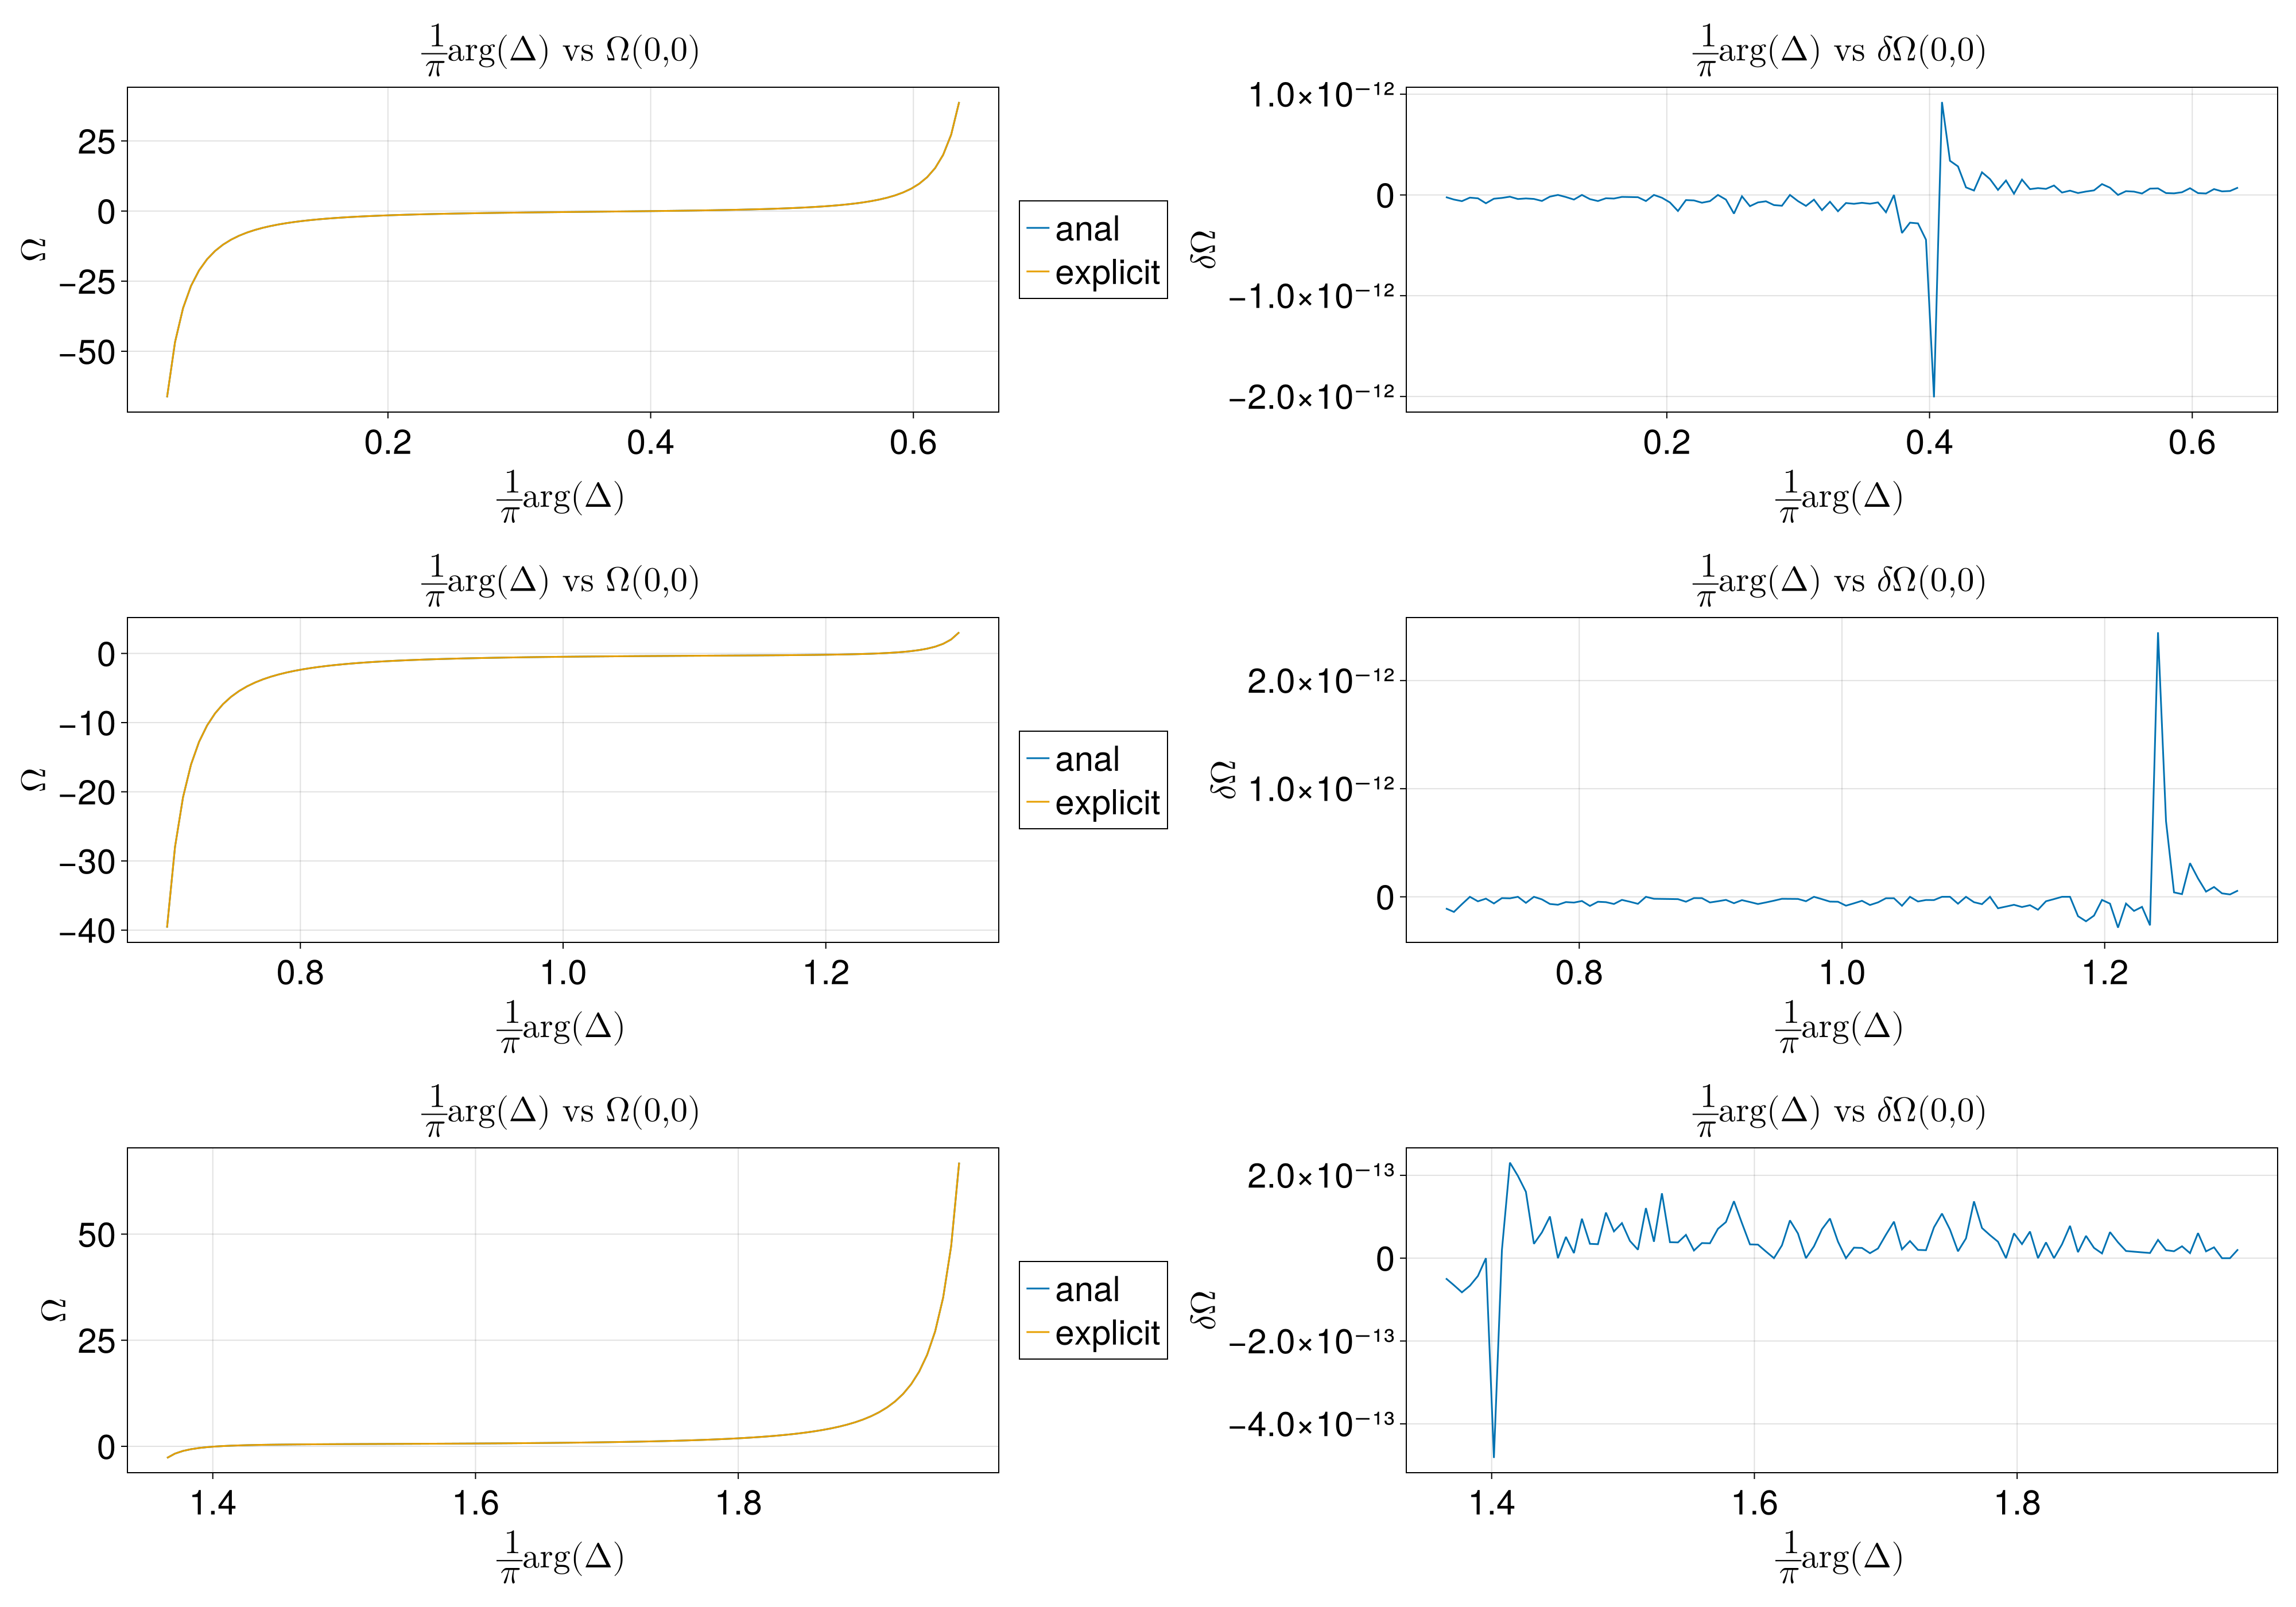

In [163]:
check_A3_term(0.5, alpha)

<font size="12">$$\text{Im} [(\partial_{q_x} \bar{A}_5) (\partial_{q_y} A_5)]$$</font>

In [218]:
function analytic_A5_term(delta, alpha, index)
    omega = exp(im * 2 * pi/ 3)
    k = index - 2
    
    nmz = (64 * real(omega^k * delta)^6 - 48 * abs2(delta) * real(omega^k * delta)^4 - 16 * real(delta^3) * real(omega^k * delta)^3 + 
    12 * abs2(delta)^2 * real(omega^k * delta)^2 + 12 * abs2(delta) * real(delta^3) * real(omega^k * delta) + 3 * abs2(delta)^3)

    term_x1 = 1/sqrt(nmz) * (-abs(delta)/(2 * nmz) * (-96 * real(omega^k * delta)^4 * real(conj(delta) * alpha) + 
    6 * abs2(delta)^2 * real(conj(delta) * alpha)) * (2 * conj(delta) * real(omega^k * delta) + delta^2))

    term_x2 = 1/sqrt(nmz) * (-1/abs(delta) * real(conj(delta) * alpha) * (2 * conj(delta) * real(omega^k * delta) + delta^2))

    term_x3 = 1/sqrt(nmz) * (abs(delta) * (alpha * delta - 2 * conj(alpha) * real(omega^k * delta)))

    term_y1 = 1/sqrt(nmz) * (-abs(delta)/(2 * nmz) * (-96 * sqrt(3) * real(omega^k * delta)^4 * real(conj(delta) * alpha) + 
    48 * sqrt(3) * abs2(delta) * real(omega^k * delta)^2 * real(conj(delta) * alpha) - 
    6 * sqrt(3) * abs2(delta)^2 * real(conj(delta) * alpha)) * (2 * delta * real(omega^k * delta) + conj(delta)^2))

    term_y2 = 1/sqrt(nmz) * (-sqrt(3)/abs(delta) * real(conj(delta) * alpha) * (2 * delta * real(omega^k * delta) + conj(delta)^2))

    term_y3 = 1/sqrt(nmz) * (abs(delta) * (2 * sqrt(3) * alpha * real(omega^k * delta) - sqrt(3) * conj(alpha) * conj(delta)))

    dxA5, dyA5 = analytic_d_A5(delta, alpha, index)
    return imag(conj(dxA5) * dyA5)
    # return imag(term_x3 * term_y2)
    # return imag(term_x1 * term_y2 + term_x1 * term_y3 + term_x2 * term_y1 + term_x2 * term_y3 + term_x3 * term_y1 + term_x3 * term_y2)
 
end

analytic_A5_term (generic function with 1 method)

In [219]:
function explicit_A5_term(delta, alpha, index)
    omega = exp(im * 2 * pi/ 3)
    k = index - 2
    
    nmz = (64 * real(omega^k * delta)^6 - 48 * abs2(delta) * real(omega^k * delta)^4 - 16 * real(delta^3) * real(omega^k * delta)^3 + 
    12 * abs2(delta)^2 * real(omega^k * delta)^2 + 12 * abs2(delta) * real(delta^3) * real(omega^k * delta) + 3 * abs2(delta)^3)

    term1 = 0
    
    term2 = -sqrt(3)*abs2(delta)/(2 * nmz^2) * real(alpha * conj(delta)) * (-96 * real(omega^k * delta)^4 + 6 * abs2(delta)^2) * 
    (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 4 * real(omega^k * delta) * imag(alpha * delta^2) + 
    abs2(delta) * imag(alpha * conj(delta)))

    term3 = 0

    term4 = -sqrt(3)/nmz * real(alpha * conj(delta)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) + abs2(delta) * imag(alpha * conj(delta)))

    term5 = -sqrt(3)*abs2(delta)/(2 * nmz^2) * real(alpha * conj(delta)) * (-96 * real(omega^k * delta)^4 + 
    48 * abs2(delta) * real(omega^k * delta)^2 - 6 * abs2(delta)^2) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) + abs2(delta) * imag(alpha * conj(delta)))

    term6 = -sqrt(3)/nmz * real(alpha * conj(delta)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) + abs2(delta) * imag(alpha * conj(delta)))

    term = -2*sqrt(3)/nmz * real(alpha * conj(delta)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) + abs2(delta) * imag(alpha * conj(delta))) * 
    (12*abs2(delta)/nmz * real(omega^k * delta)^2 * (abs2(delta) - 4 * real(omega^k * delta)^2) + 1)

    return term
end

explicit_A5_term (generic function with 1 method)

In [345]:
function check_A5_term(delta_mag, alpha)
    n_pts = 10^2
    ang_list_1 = range(0 + 0.1, 2*pi/3 - 0.1, n_pts)
    ang_list_2 = range(2*pi/3 + 0.1, 4*pi/3 - 0.1, n_pts)
    ang_list_3 = range(4*pi/3 + 0.1, 2*pi - 0.1, n_pts)
    curvatures = Array{Float64}(undef, n_pts, 3, 2)
    errors = Array{Float64}(undef, n_pts, 3)
    P = Figure(size=(2000, 1400), fontsize=30)
    for j in 1:n_pts
        delta = delta_mag * exp(im * ang_list_1[j])
        curvatures[j, 1, 1] = analytic_A5_term(delta, alpha, 2)
        curvatures[j, 1, 2] = explicit_A5_term(delta, alpha, 2)
        errors[j, 1] = 10^2 * abs(curvatures[j, 1, 1] - curvatures[j, 1, 2]) / curvatures[j, 1, 2]

        delta = delta_mag * exp(im * ang_list_2[j])
        curvatures[j, 2, 1] = analytic_A5_term(delta, alpha, 2)
        curvatures[j, 2, 2] = explicit_A5_term(delta, alpha, 2)
        errors[j, 2] = 10^2 * abs(curvatures[j, 2, 1] - curvatures[j, 2, 2]) / curvatures[j, 2, 2]

        delta = delta_mag * exp(im * ang_list_3[j])
        curvatures[j, 3, 1] = analytic_A5_term(delta, alpha, 2)
        curvatures[j, 3, 2] = explicit_A5_term(delta, alpha, 2)
        errors[j, 3] = 10^2 * abs(curvatures[j, 3, 1] - curvatures[j, 3, 2]) / curvatures[j, 3, 2]
    end
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 1], label = "anal")
    lines!(ax1, 1/pi .* ang_list_1, curvatures[:, 1, 2], label = "explicit")
    P[1, 2] = Legend(P, ax1, framevisible = true)

    ax4 = Axis(P[1, 3], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \delta \Omega(0, 0)",
     xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\delta \Omega")
    lines!(ax4, 1/pi .* ang_list_1, errors[:, 1])

    ax2 = Axis(P[2, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 1], label = "anal")
    lines!(ax2, 1/pi .* ang_list_2, curvatures[:, 2, 2], label = "explicit")
    P[2, 2] = Legend(P, ax2, framevisible = true)

    ax5 = Axis(P[2, 3], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \delta \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\delta \Omega")
    lines!(ax5, 1/pi .* ang_list_2, errors[:, 2])
    
    ax3 = Axis(P[3, 1], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\Omega")
    lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 1], label = "anal")
    lines!(ax3, 1/pi .* ang_list_3, curvatures[:, 3, 2], label = "explicit")
    P[3, 2] = Legend(P, ax3, framevisible = true)
    
    ax6 = Axis(P[3, 3], title = L"\frac{1}{\pi}\text{arg} (\Delta) \text{ vs } \delta \Omega(0, 0)", 
    xlabel = L"\frac{1}{\pi}\text{arg}(\Delta)", ylabel = L"\delta \Omega")
    lines!(ax6, 1/pi .* ang_list_3, errors[:, 3])
    P
end

check_A5_term (generic function with 1 method)

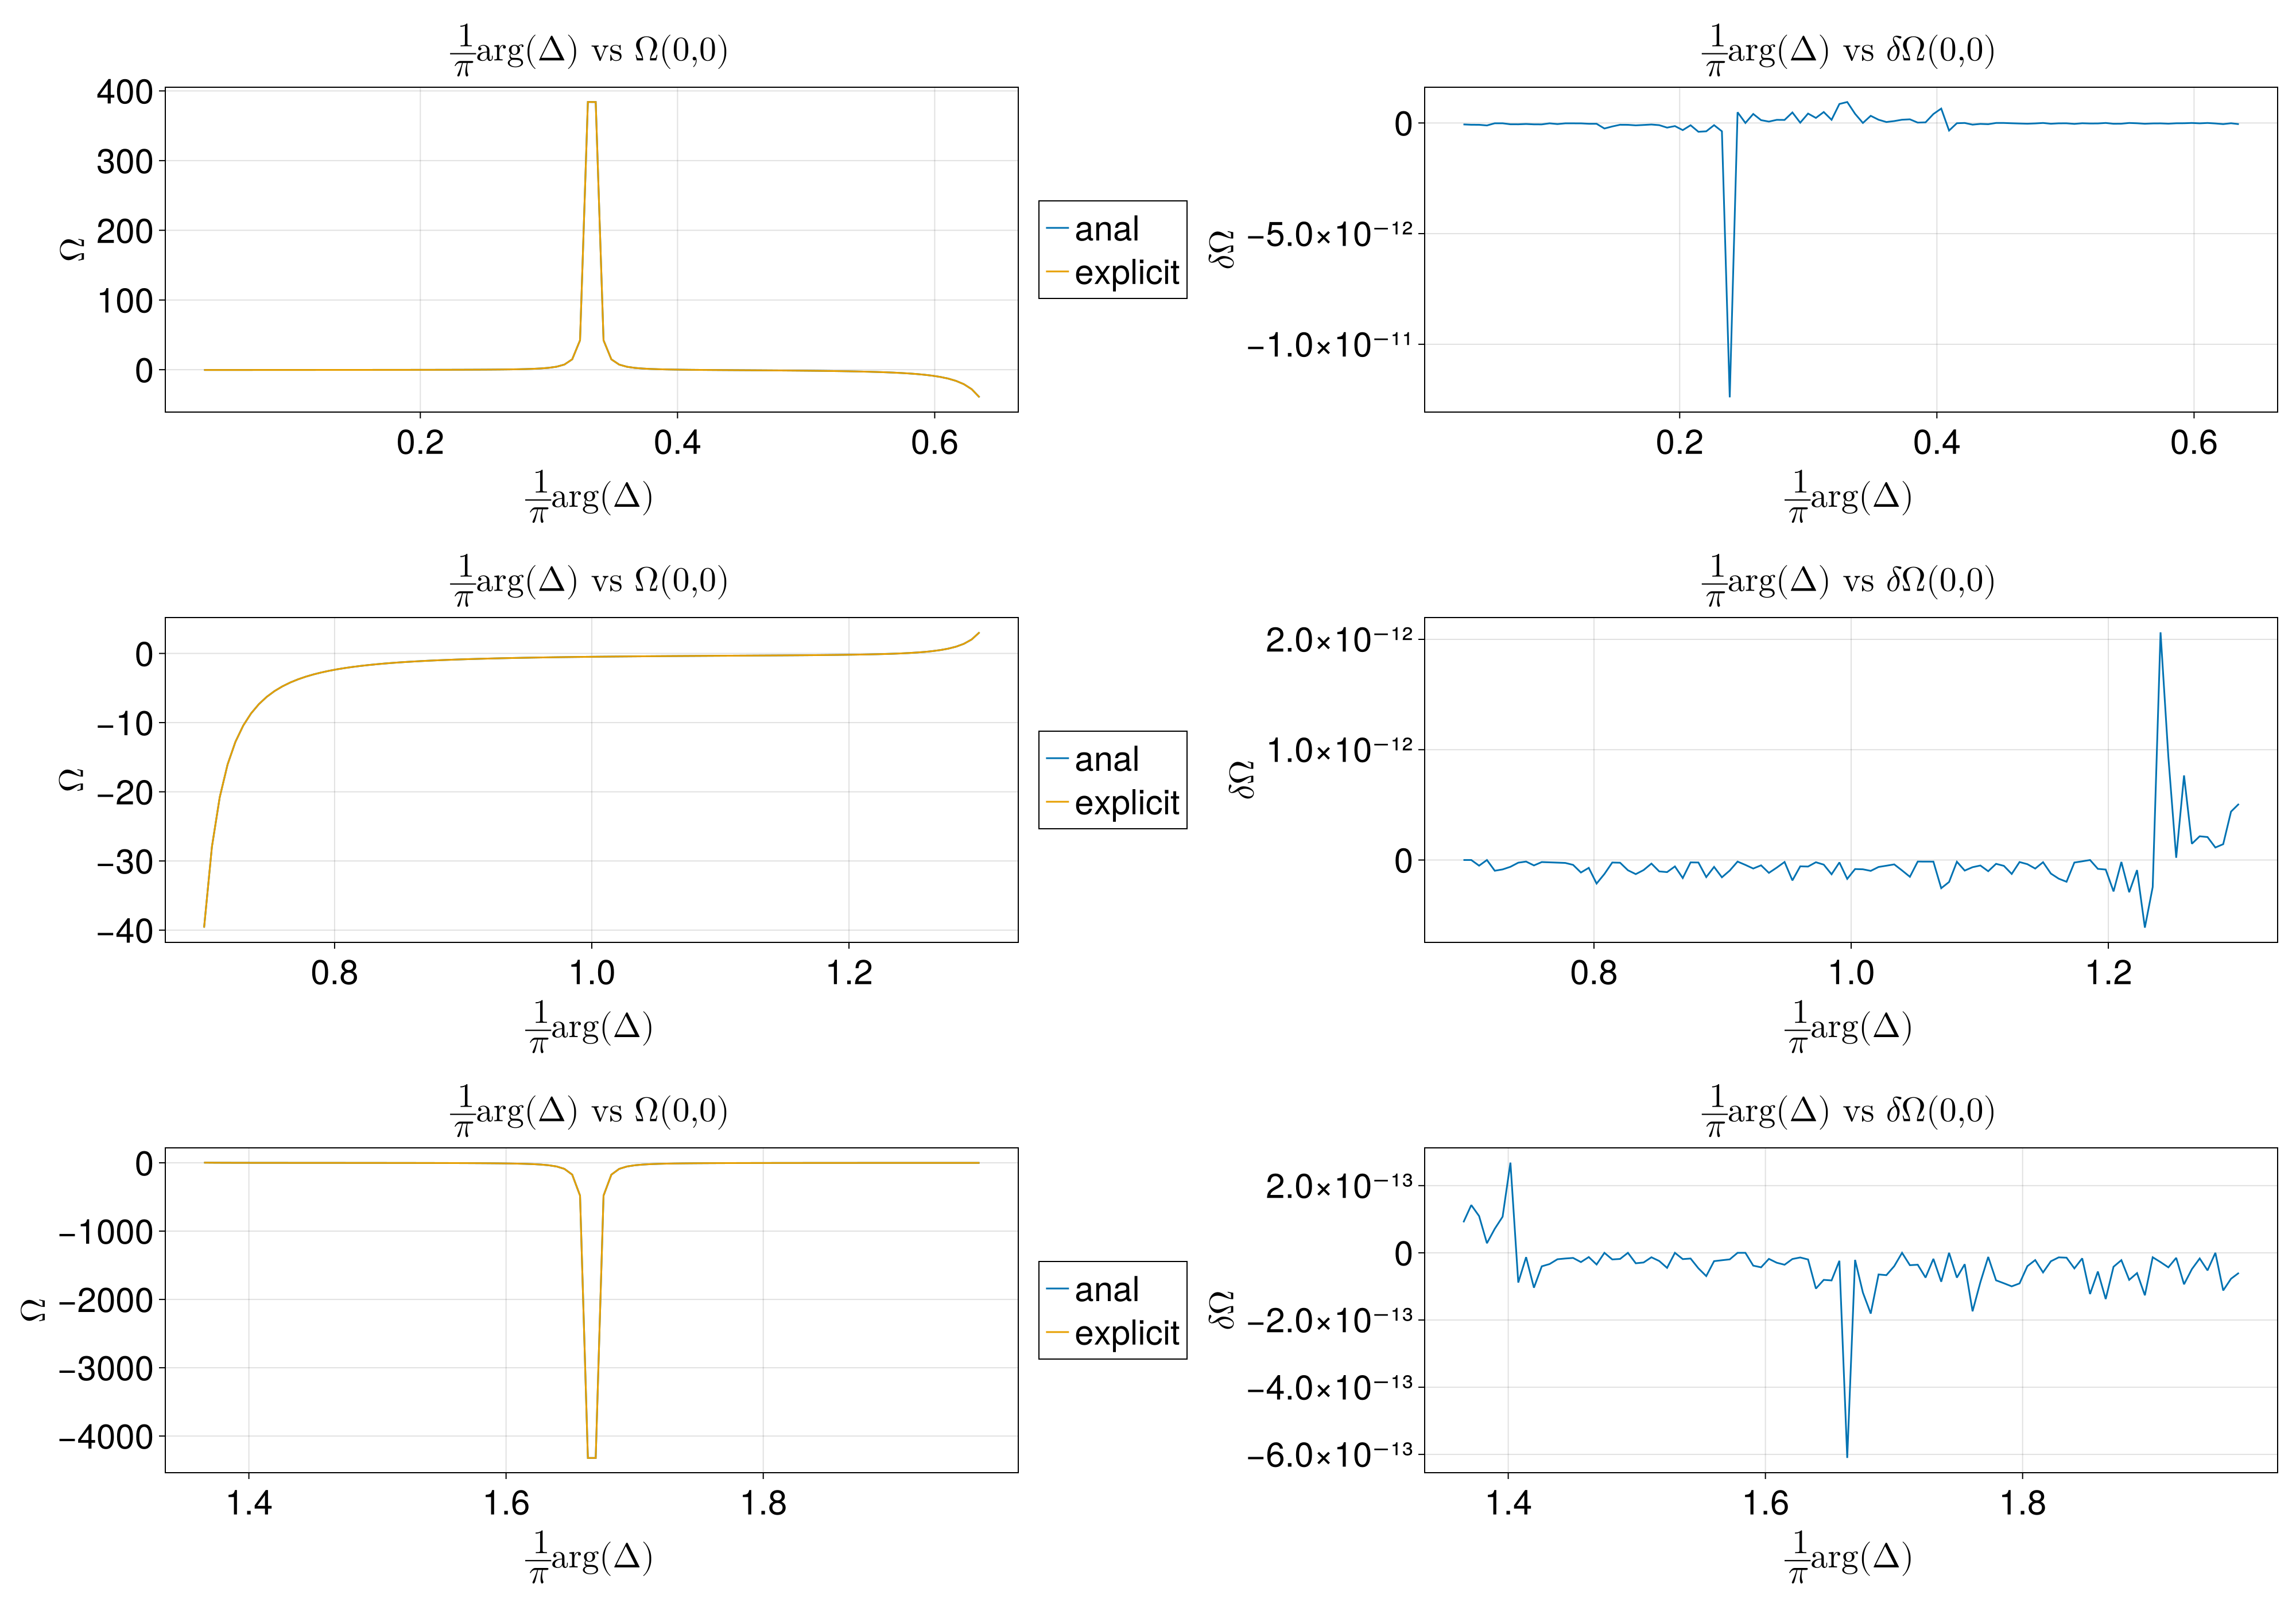

In [346]:
check_A5_term(0.5, alpha)

<font size="12">$$\tilde{\Omega}(0,0) = 0$$</font>

In [57]:
function plot_bc_zeros()
    n_pts = 10^2
    x_list = range(-0.5, 0.5, n_pts)
    solutions = Array{Float64}(undef, n_pts, 3, 2)
    for i in 1:n_pts
        x = x_list[i]
        for k in 0:2
            phi = 1/2 * (k * 2*pi/3 + asin(x) + asin(2 * x))
            theta = 1/2 * (k * 2*pi/3 + asin(x) - asin(2 * x))
            solutions[i, k + 1, 1] = phi
            solutions[i, k + 1, 2] = theta
        end
    end
    P = Figure(size=(2200, 1000), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"(\text{arg}[\Delta], \ \text{arg}[\alpha]) \text{ | } \tilde{\Omega}_k(0,0) = 0", 
    xlabel = L"\text{arg}[\Delta]", ylabel = L"\text{arg}[\alpha]")
    lines!(solutions[:, 1, 1], solutions[:, 1, 2], label = L"k = 0")
    lines!(solutions[:, 2, 1], solutions[:, 2, 2], label = L"k = 1")
    lines!(solutions[:, 3, 1], solutions[:, 3, 2], label = L"k = 2")
    P[1, 2] = Legend(P, ax1, framevisible = true)

    ax2 = Axis(P[1, 3], title = L"(\text{arg}[\Delta], \ \text{arg}[\alpha]) \text{ | } \tilde{\Omega}_k(0,0) = 0", 
    xlabel = L"\text{arg}[\Delta]", ylabel = L"\text{arg}[\alpha]")
    for j in -3:3
        delta_list = range(-pi, pi, n_pts)
        alpha_list = delta_list .+ (2 * j + 1)/2 * pi
        lines!(delta_list, alpha_list, label = string(j))
    end
    P[1, 4] = Legend(P, ax2, framevisible = true)
    P
end

plot_bc_zeros (generic function with 1 method)

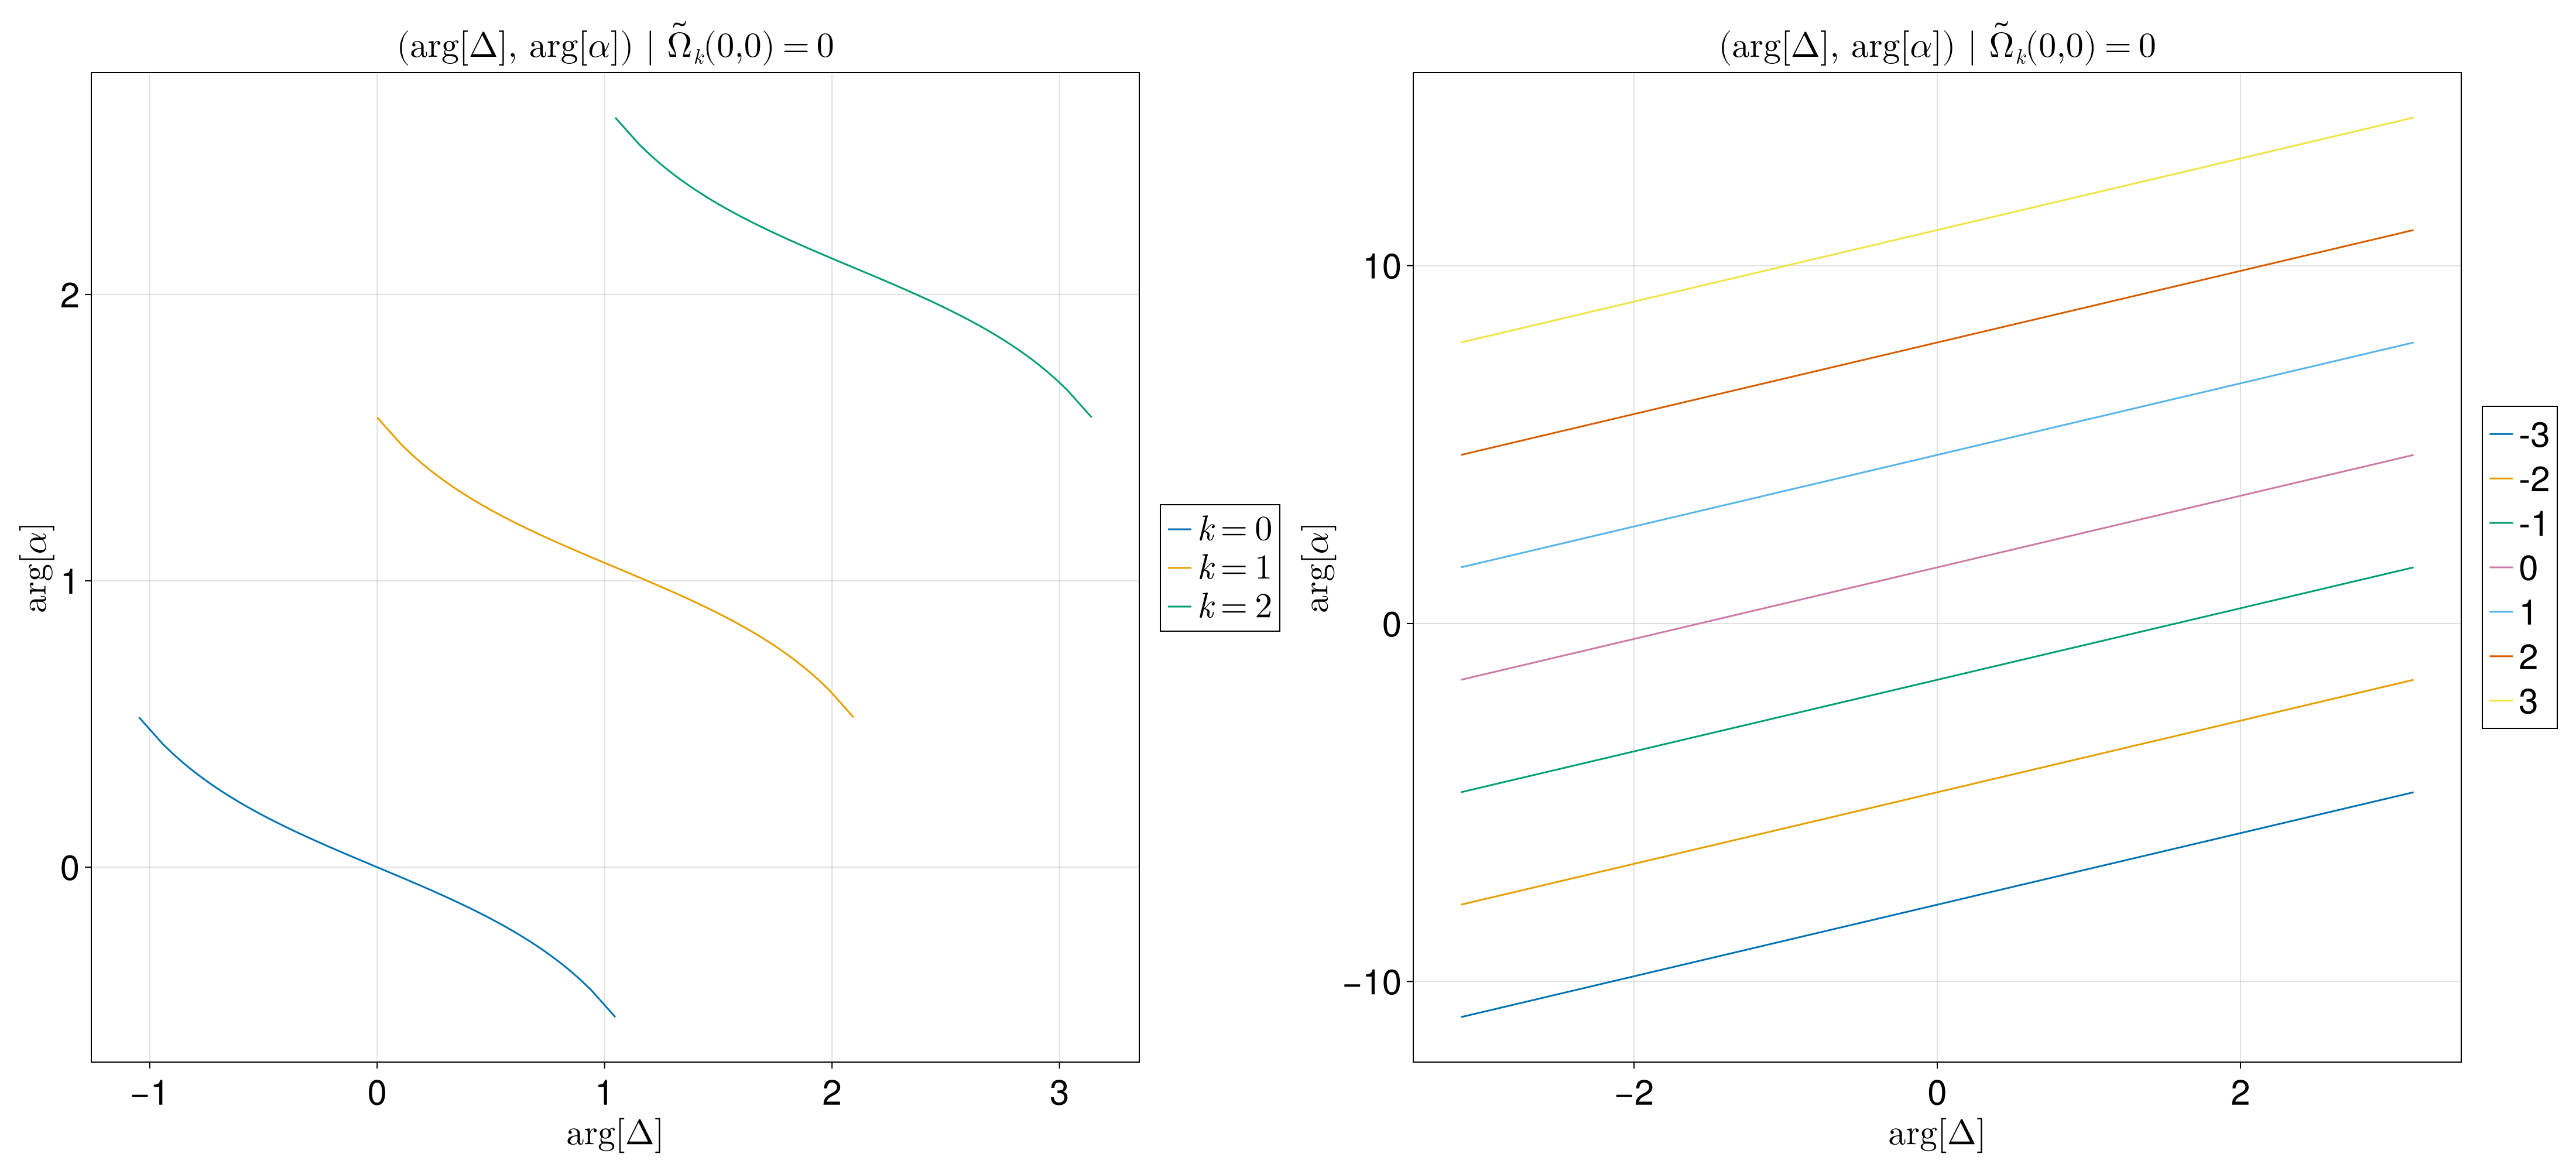

In [58]:
plot_bc_zeros()